In [1]:
import zipfile
import os
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week7/'
%cd '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week7/'

Mounted at /content/drive
/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week7


In [3]:
# Storing the path of the data file from the Google drive
path = 'cust_seg.csv.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    file_list = zip_ref.namelist()

    csv_files = [f for f in file_list if f.endswith('.csv')]

    # Check the size of the CSV file and read it
    if csv_files:
        total_rows = 0

        for csv_file in csv_files:
            print(f"Processing file: {csv_file}")

            with zip_ref.open(csv_file) as f:
                try:
                    chunk_size = 100000
                    for chunk in pd.read_csv(f, chunksize=chunk_size, on_bad_lines='skip', encoding='ISO-8859-1'):
                        total_rows += len(chunk)
                except pd.errors.ParserError as e:
                    print(f"ParserError encountered in {csv_file}:", e)
        print(f"Total rows across all CSV filed: {total_rows}")
    else:
        print("No CSV files found in the ZIP archive.")

Processing file: cust_seg.csv


<ipython-input-3-db557ff74d79>:21: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, chunksize=chunk_size, on_bad_lines='skip', encoding='ISO-8859-1'):
<ipython-input-3-db557ff74d79>:21: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, chunksize=chunk_size, on_bad_lines='skip', encoding='ISO-8859-1'):
<ipython-input-3-db557ff74d79>:21: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, chunksize=chunk_size, on_bad_lines='skip', encoding='ISO-8859-1'):
<ipython-input-3-db557ff74d79>:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(f, chunksize=chunk_size, on_bad_lines='skip', encoding='ISO-8859-1'):


Processing file: __MACOSX/._cust_seg.csv
Total rows across all CSV filed: 1000000


In [4]:
original_df = pd.read_csv('/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week7/cust_seg.csv')
original_df

#df = pd.DataFrame(/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week8/cust_seg.csv)

<ipython-input-4-89c812f295d3>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week7/cust_seg.csv')


,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,28.0,MADRID,1.0,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,S,NaN,KFC,N,1.0,28.0,MADRID,1.0,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [5]:
df = original_df.copy()

#Understanding Data

In [6]:
df.shape

(1000000, 48)

In [7]:
df.describe()

,Unnamed: 0,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1000000.000000,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,499999.500000,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,0.000039,0.749626,0.000591,0.105296,0.013623,0.009894,0.212486,0.072079,0.002158,0.003150,0.066881,0.106267,0.027182,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,288675.278933,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,0.006245,0.433229,0.024303,0.306935,0.115920,0.098975,0.409067,0.258619,0.046404,0.056036,0.249816,0.308179,0.162614,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,0.000000,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499999.500000,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,749999.250000,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999999.000000,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [9]:
cols = df.select_dtypes(['object']).columns.tolist()

In [10]:
cols

['fecha_dato',
 'ind_empleado',
 'pais_residencia',
 'sexo',
 'age',
 'fecha_alta',
 'antiguedad',
 'ult_fec_cli_1t',
 'tiprel_1mes',
 'indresi',
 'indext',
 'conyuemp',
 'canal_entrada',
 'indfall',
 'nomprov']

In [11]:
df.describe(include='object').T

,count,unique,top,freq
fecha_dato,1000000,2,2015-01-28,625457
ind_empleado,989218,5,N,988260
pais_residencia,989218,113,ES,982264
sexo,989214,2,V,562000
age,1000000,115,22,51017
fecha_alta,989218,6238,2013-10-14,3920
antiguedad,1000000,249,21,34320
ult_fec_cli_1t,1101,22,2015-07-01,97
tiprel_1mes,989218,3,A,547800
indresi,989218,2,S,982264


In [12]:
cols_obj = df.select_dtypes(['object'])

for i in cols_obj.columns:
  print('Unique values in', i, 'are :')
  print(df[i].value_counts())
  print('*'*40)

Unique values in fecha_dato are :
fecha_dato
2015-01-28    625457
2015-02-28    374543
Name: count, dtype: int64
****************************************
Unique values in ind_empleado are :
ind_empleado
N    988260
B       387
A       287
F       282
S         2
Name: count, dtype: int64
****************************************
Unique values in pais_residencia are :
pais_residencia
ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: count, Length: 113, dtype: int64
****************************************
Unique values in sexo are :
sexo
V    562000
H    427214
Name: count, dtype: int64
****************************************
Unique values in age are :
age
 22    51017
 23    45366
 24    38992
 21    34015
 44    28800
       ...  
110       14
115       12
  2       11
113        8
116        4
Name: count, Length: 115, dtype: int64
****************************************
Unique values 

In [13]:
cols_num = df.select_dtypes(['int64']).columns.tolist()

In [14]:
cols_num

['Unnamed: 0',
 'ncodpers',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_recibo_ult1']

In [15]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000000.0,499999.500000,288675.278933,0.0,249999.75,499999.5,749999.25,999999.0
ncodpers,1000000.0,690596.670395,404408.432011,15889.0,336411.00,664476.0,1074511.25,1379131.0
ind_ahor_fin_ult1,1000000.0,0.000177,0.013303,0.0,0.00,0.0,0.00,1.0
ind_aval_fin_ult1,1000000.0,0.000039,0.006245,0.0,0.00,0.0,0.00,1.0
ind_cco_fin_ult1,1000000.0,0.749626,0.433229,0.0,0.00,1.0,1.00,1.0
ind_cder_fin_ult1,1000000.0,0.000591,0.024303,0.0,0.00,0.0,0.00,1.0
ind_cno_fin_ult1,1000000.0,0.105296,0.306935,0.0,0.00,0.0,0.00,1.0
ind_ctju_fin_ult1,1000000.0,0.013623,0.115920,0.0,0.00,0.0,0.00,1.0
ind_ctma_fin_ult1,1000000.0,0.009894,0.098975,0.0,0.00,0.0,0.00,1.0
ind_ctop_fin_ult1,1000000.0,0.212486,0.409067,0.0,0.00,0.0,0.00,1.0


In [16]:
cols_numflo = df.select_dtypes(['float64']).columns.tolist()

In [17]:
cols_numflo

['ind_nuevo',
 'indrel',
 'indrel_1mes',
 'tipodom',
 'cod_prov',
 'ind_actividad_cliente',
 'renta',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1']

In [18]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
ind_nuevo,989218.0,0.000489,0.022114,0.00,0.00,0.00,0.00,1.00
indrel,989218.0,1.109074,3.267624,1.00,1.00,1.00,1.00,99.00
indrel_1mes,989218.0,1.000085,0.012954,1.00,1.00,1.00,1.00,3.00
tipodom,989218.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
cod_prov,982266.0,26.852131,12.422924,1.00,18.00,28.00,33.00,52.00
ind_actividad_cliente,989218.0,0.564971,0.495761,0.00,0.00,1.00,1.00,1.00
renta,824817.0,139646.150940,238985.824907,1202.73,71571.84,106651.86,163432.47,28894395.51
ind_nomina_ult1,994598.0,0.071629,0.257873,0.00,0.00,0.00,0.00,1.00
ind_nom_pens_ult1,994598.0,0.079543,0.270584,0.00,0.00,0.00,0.00,1.00


In [19]:
df.isnull().sum()

,0
Unnamed: 0,0
fecha_dato,0
ncodpers,0
ind_empleado,10782
pais_residencia,10782
sexo,10786
age,0
fecha_alta,10782
ind_nuevo,10782
antiguedad,0


In [20]:
df.isnull().sum().sum()

2371207

In [21]:
df.isnull()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
def null_agg_percent(df):
    agg = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/len(df)).sort_values(ascending = False)

    agg_percent = pd.DataFrame({"aggregate":agg, "percent": percent}).reset_index()
    agg_percent.columns = ["Column_Name","aggregate", "percent"]
    return agg_percent

In [23]:
null_agg_percent(df)

,Column_Name,aggregate,percent
0,conyuemp,999822,0.999822
1,ult_fec_cli_1t,998899,0.998899
2,renta,175183,0.175183
3,nomprov,17734,0.017734
4,cod_prov,17734,0.017734
5,canal_entrada,10861,0.010861
6,sexo,10786,0.010786
7,indresi,10782,0.010782
8,ind_actividad_cliente,10782,0.010782
9,tipodom,10782,0.010782


In [24]:
df_pandas= pd.DataFrame(df)

In [25]:
df_pandas.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [27]:
# check for outliers

nums_df = df.select_dtypes(include='number')

q1 = nums_df.quantile(0.25)
q3 = nums_df.quantile(0.75)

iqr = q3-q1
threshold = 1.5

upper_limit = q3 + threshold * iqr
lower_limit = q1 - threshold * iqr

In [28]:
outliers = df[nums_df[(nums_df < lower_limit) | (nums_df > upper_limit)].any(axis=1)]
print(outliers)

        Unnamed: 0  fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  ind_nuevo antiguedad  indrel ult_fec_cli_1t  indrel_1mes tiprel_1mes indresi indext conyuemp canal_entrada indfall  tipodom  cod_prov      nomprov  ind_actividad_cliente      renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
3                3  2015-01-28   1050613            N              ES    H   22  2012-08-10        0.0         35     1.0            NaN          1.0           I       S      N      NaN           KHD       N      1.0      50.0     ZARAGOZA                    0.0  119775.54     

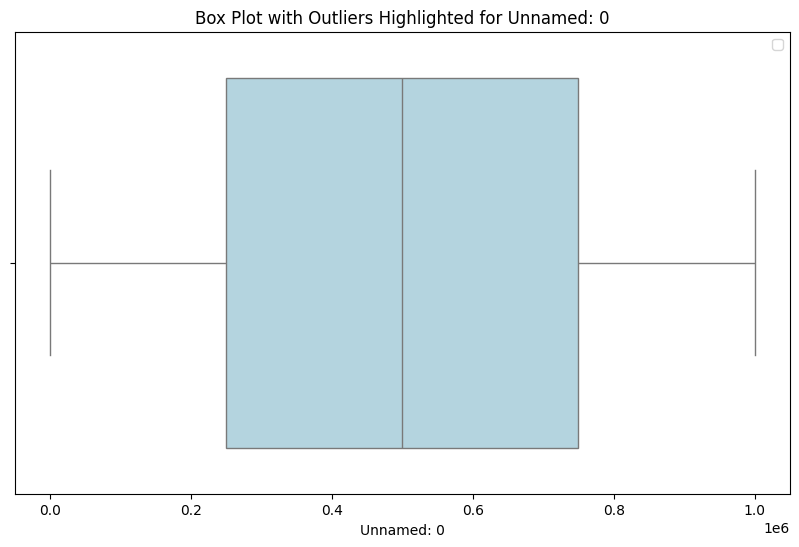

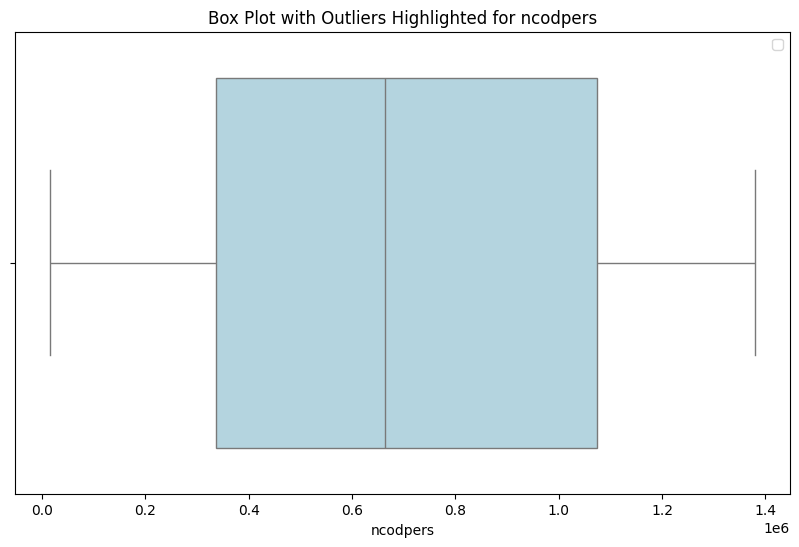

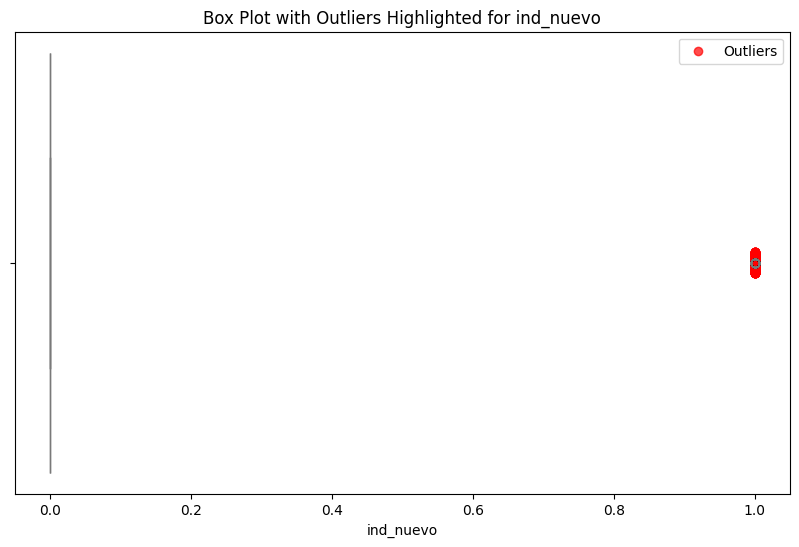

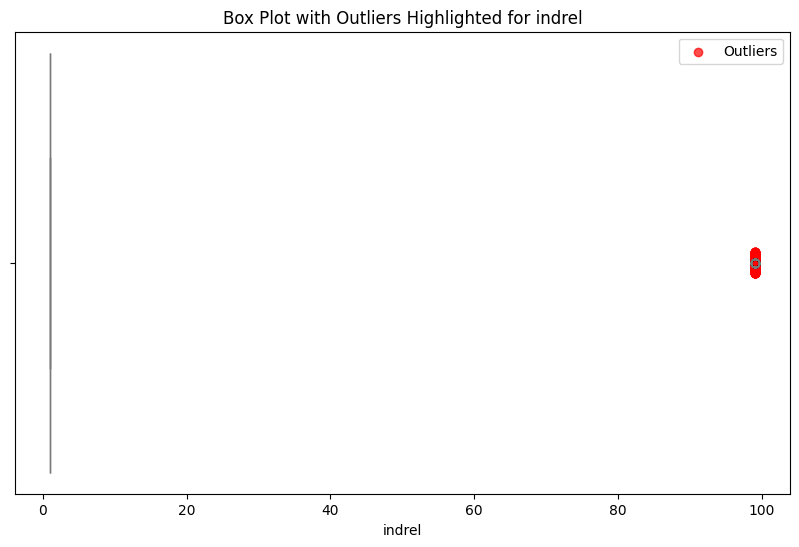

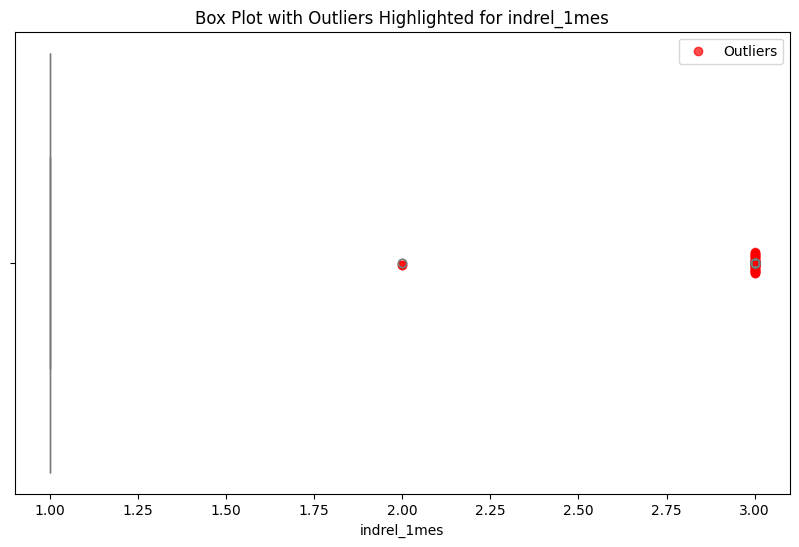

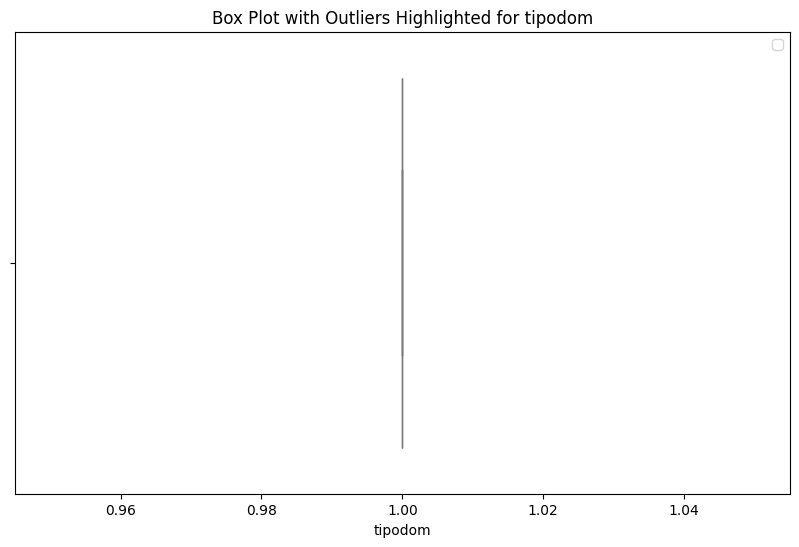

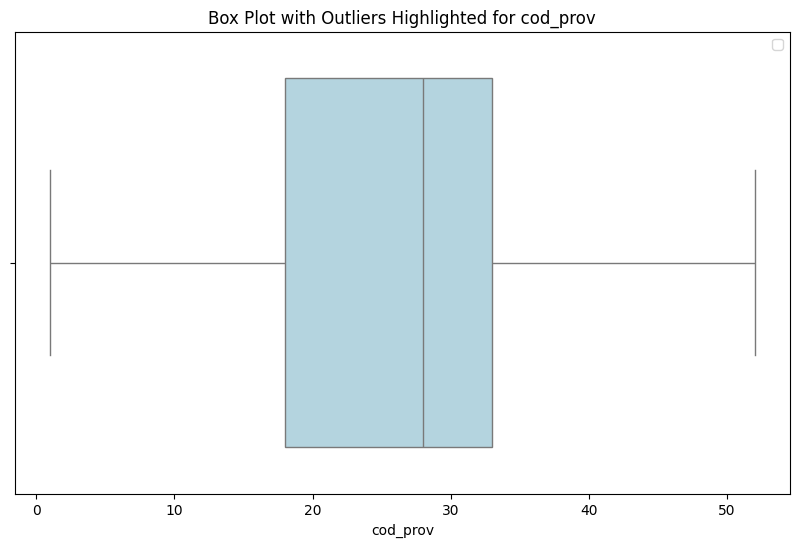

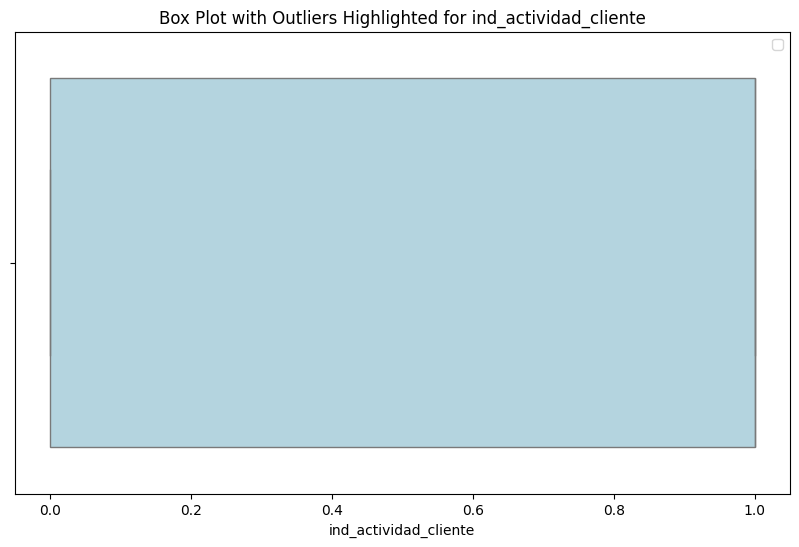

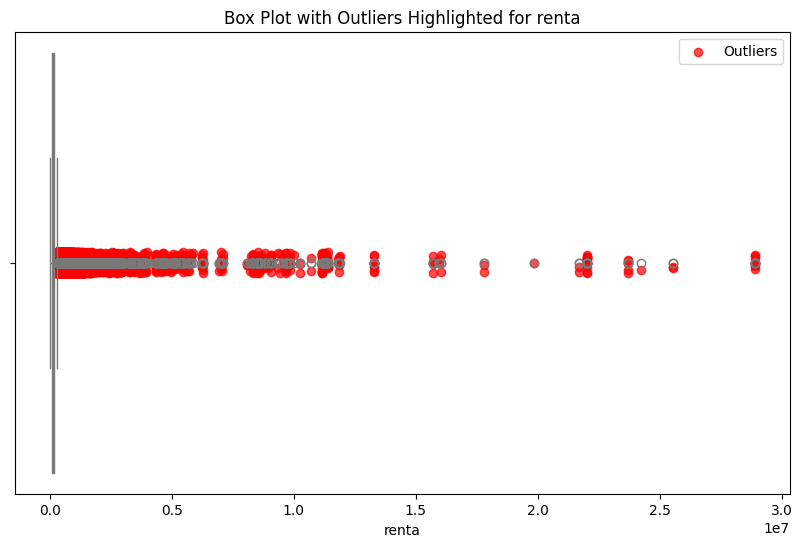

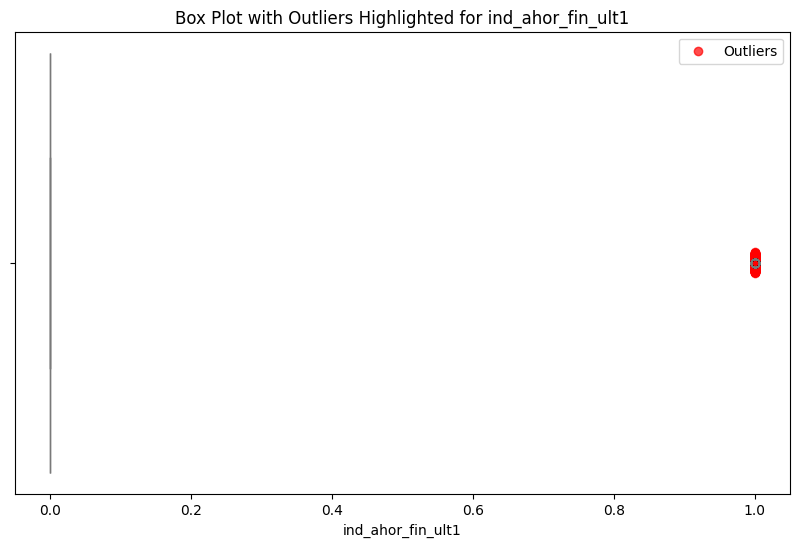

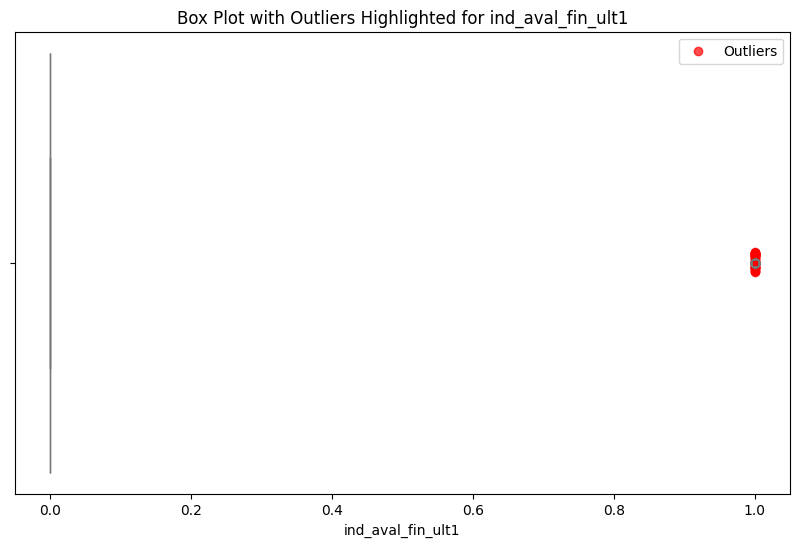

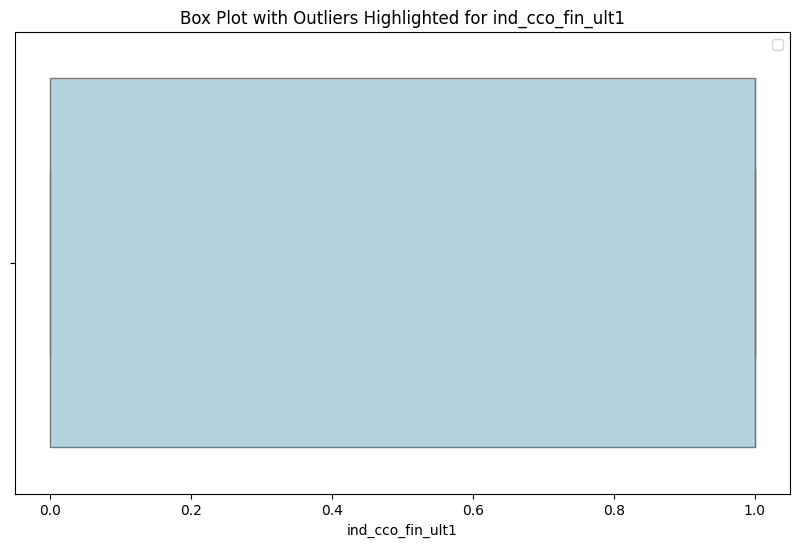

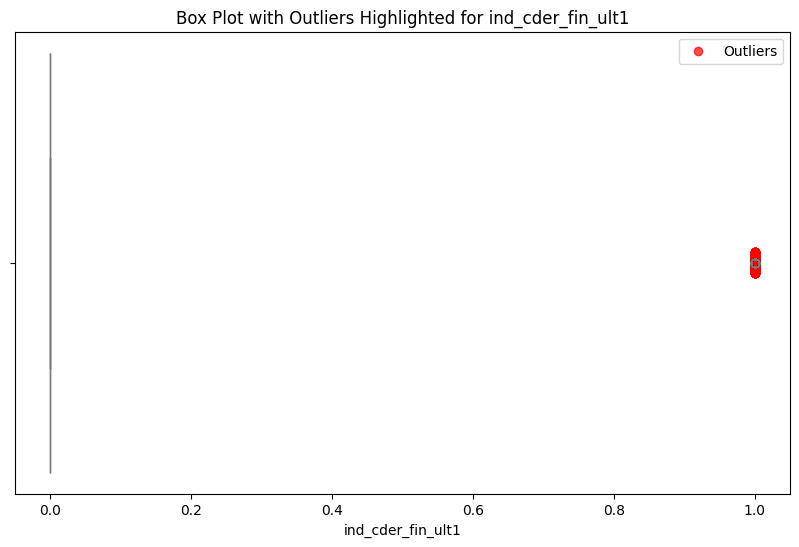

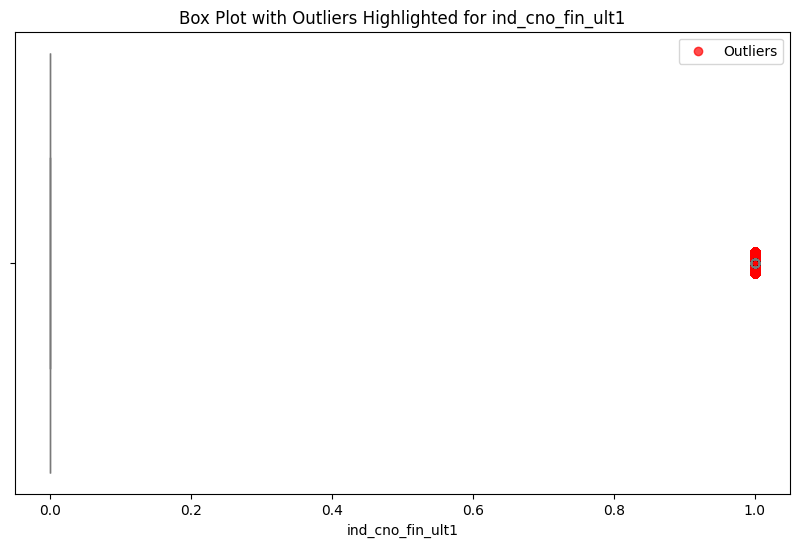

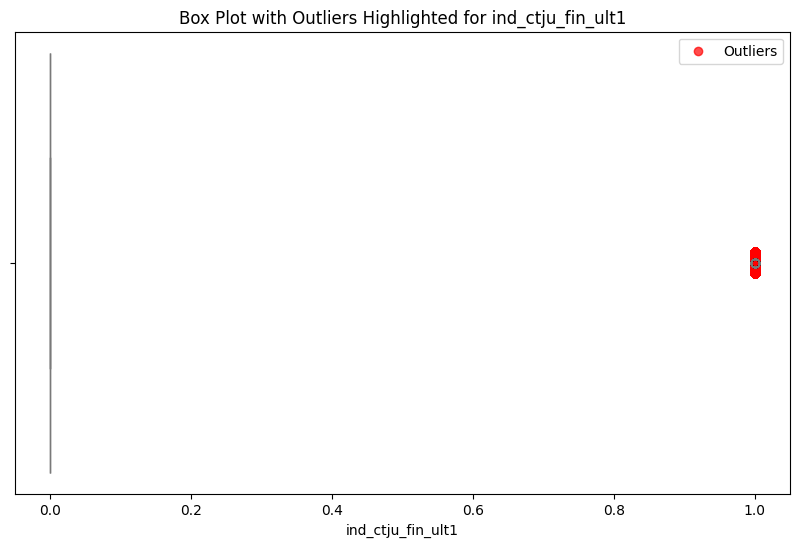

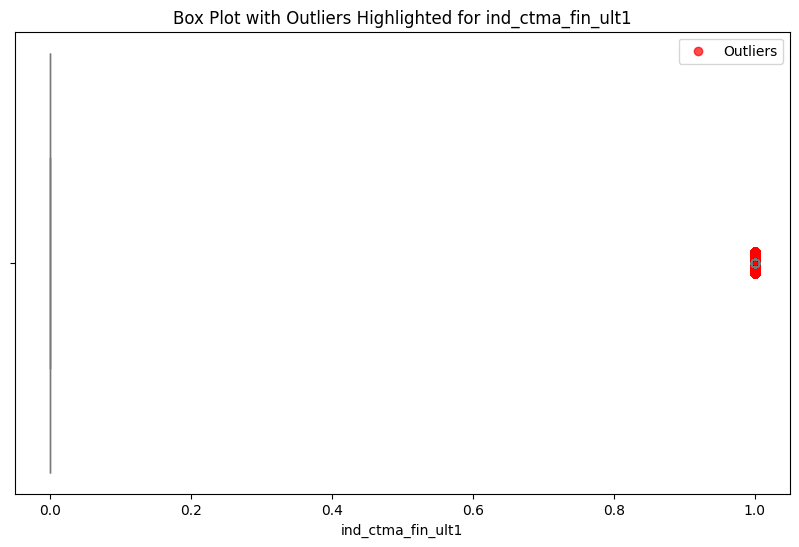

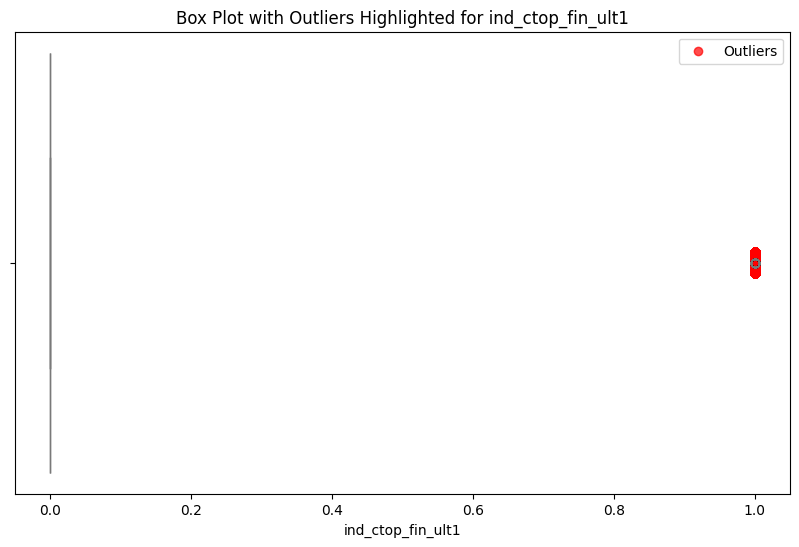

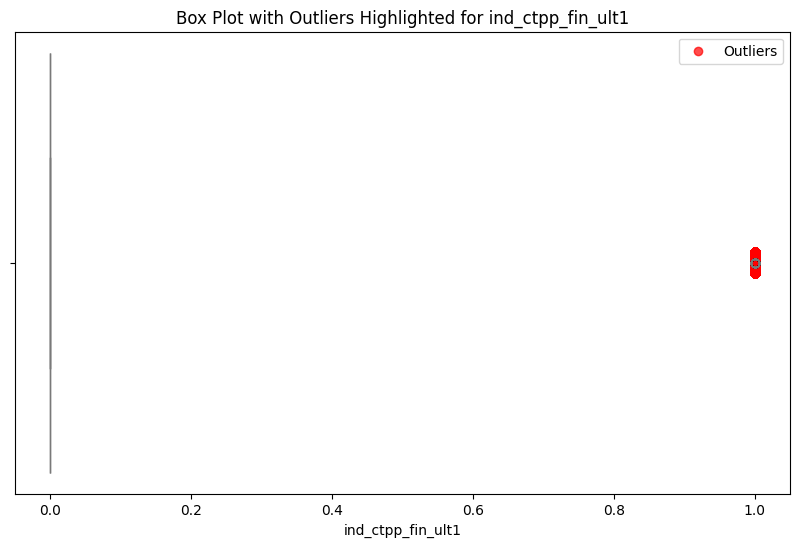

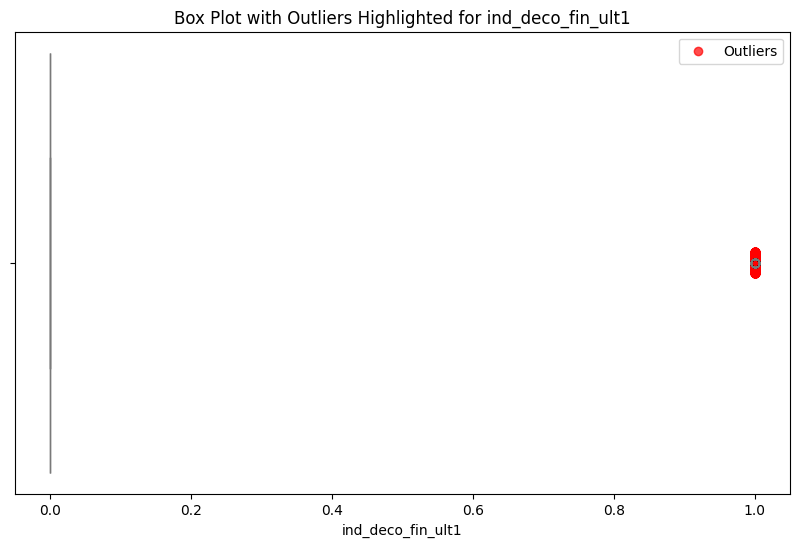

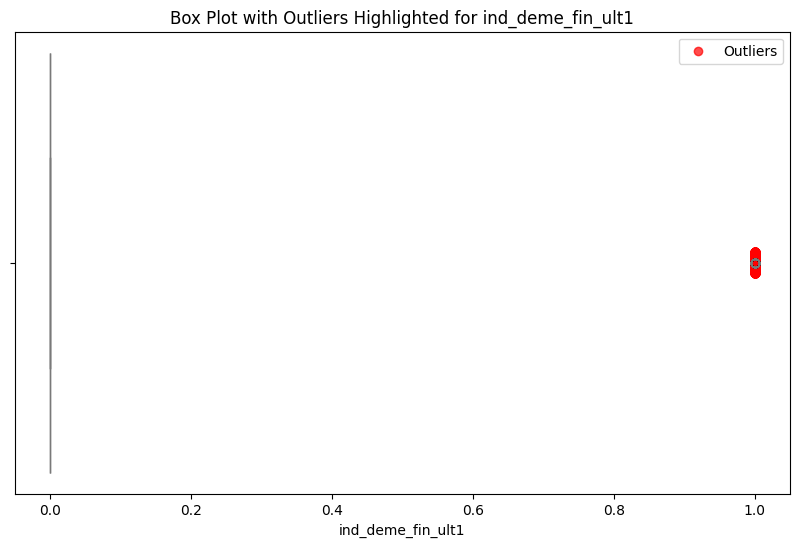

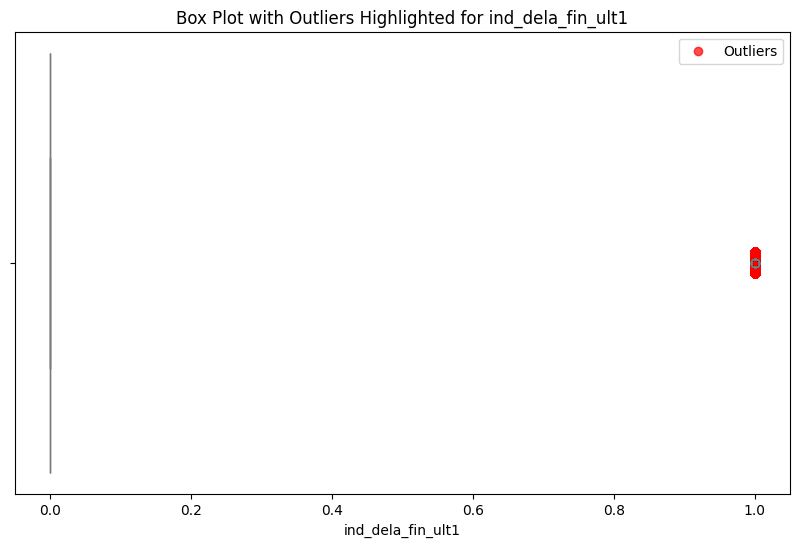

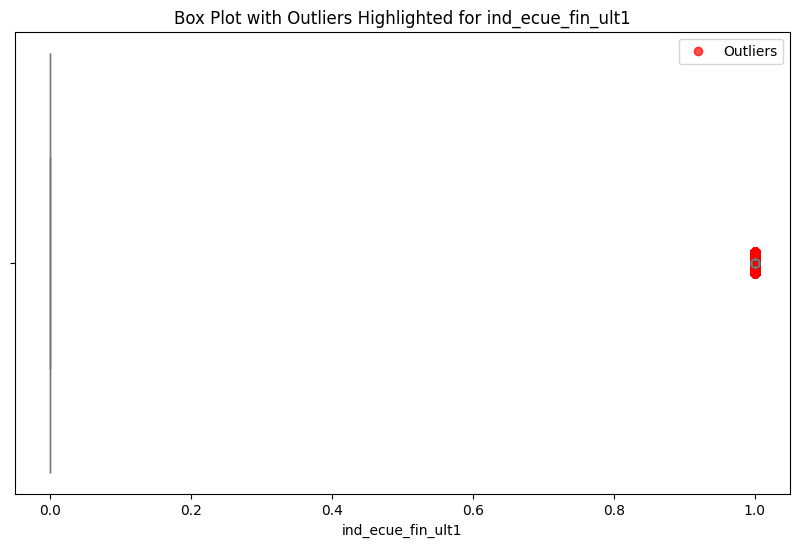

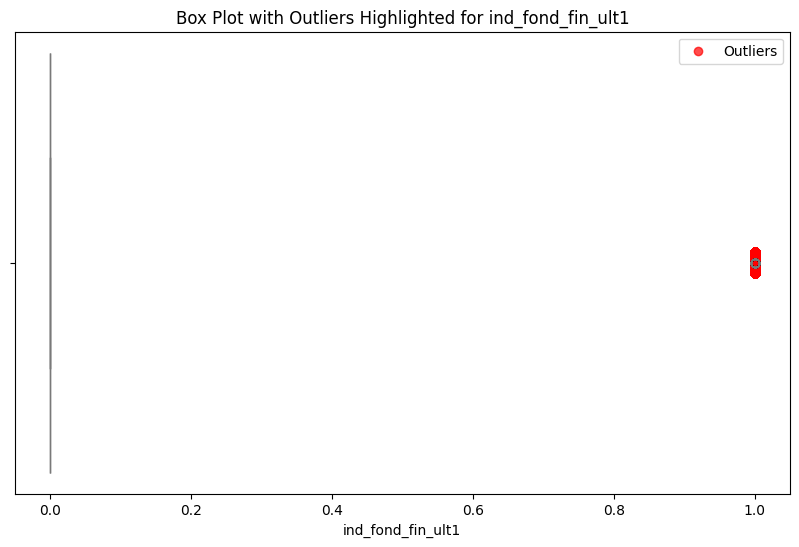

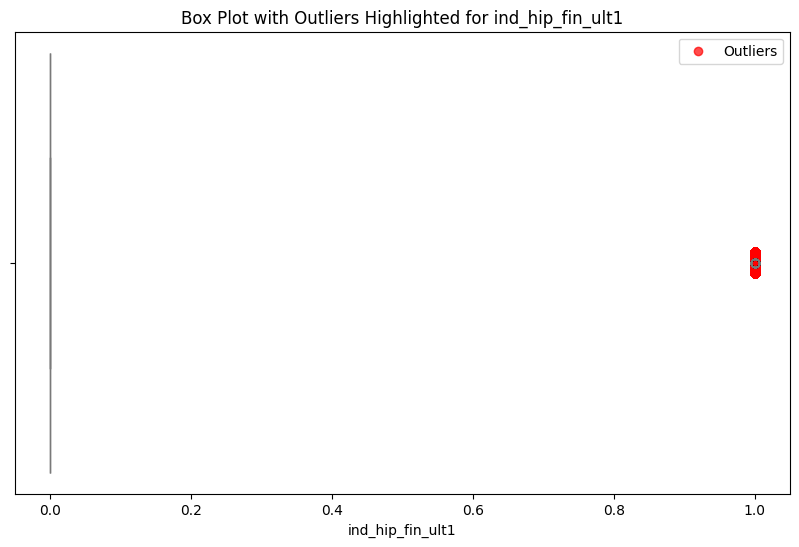

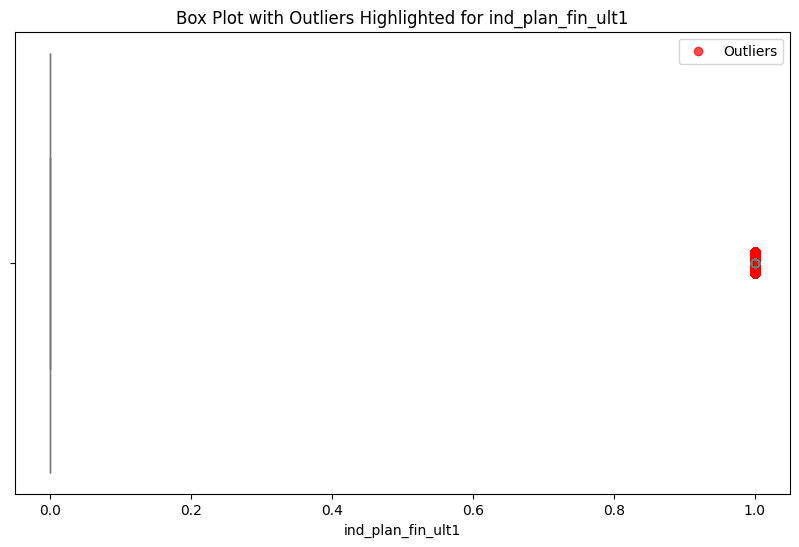

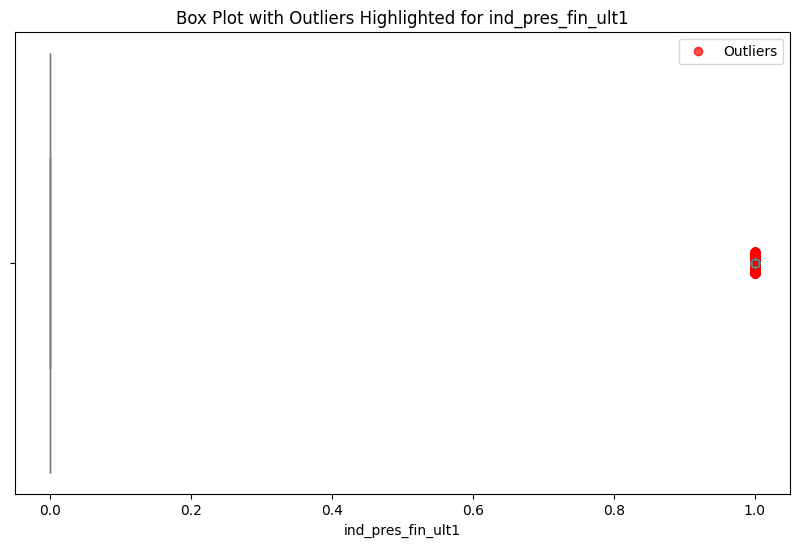

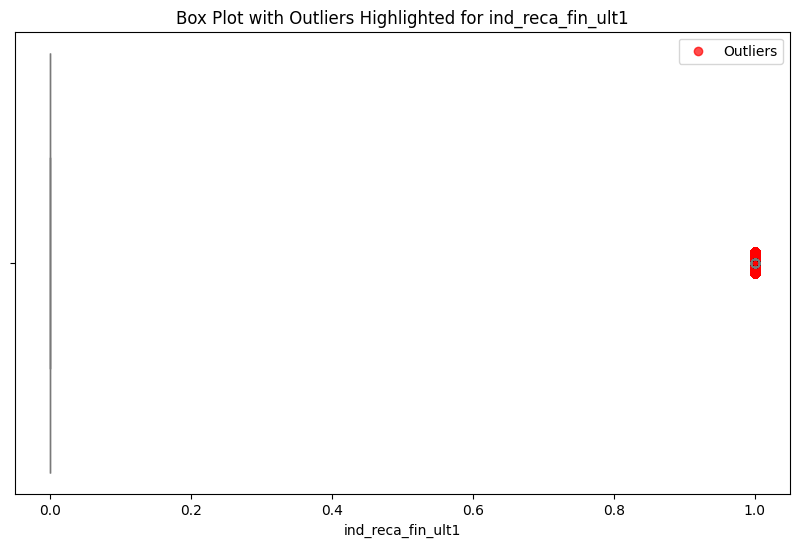

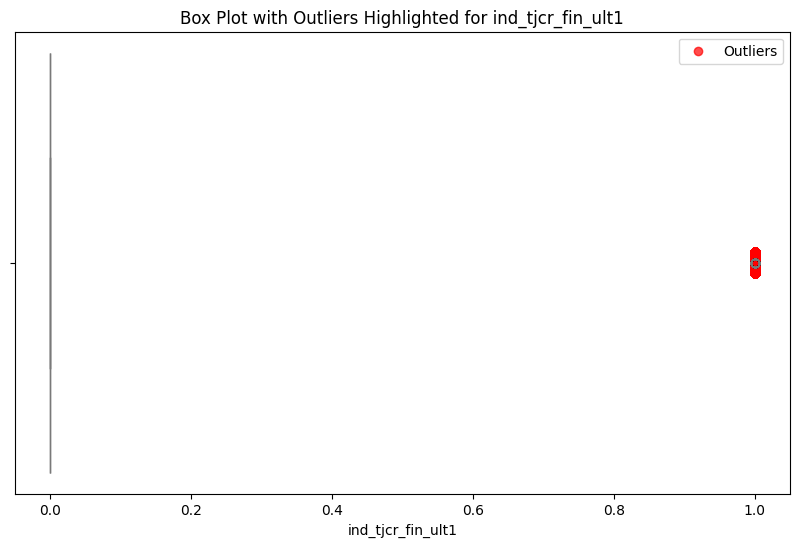

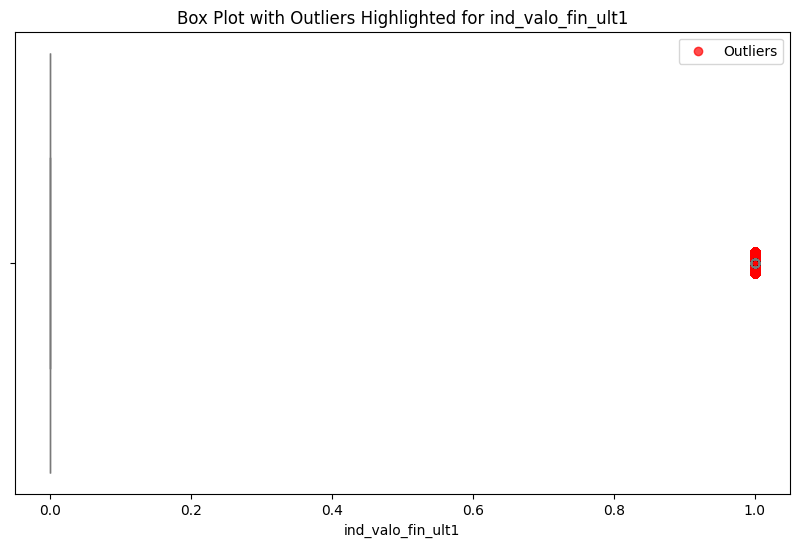

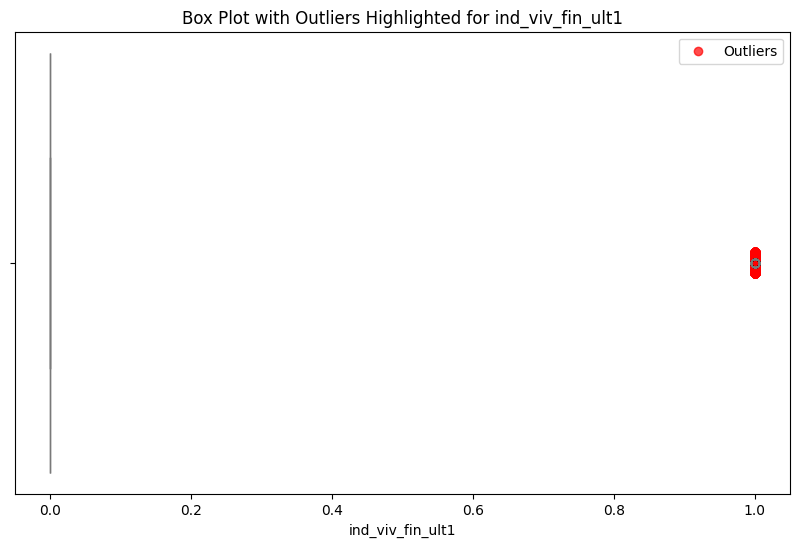

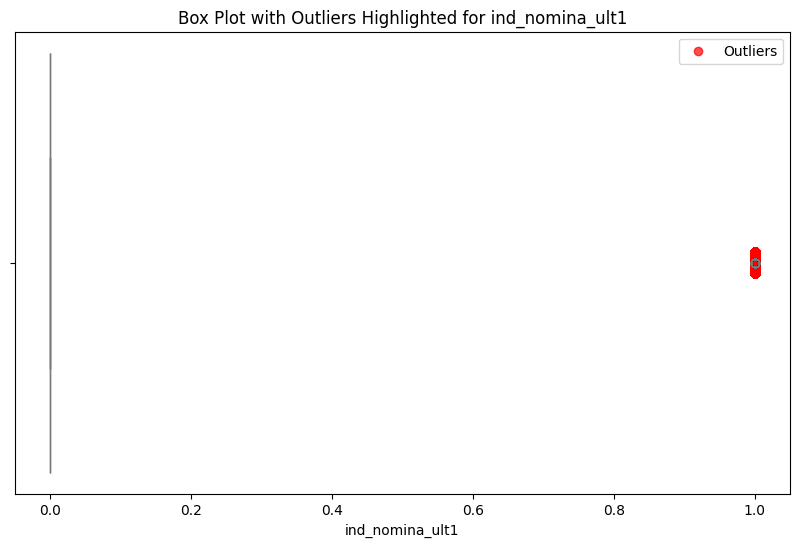

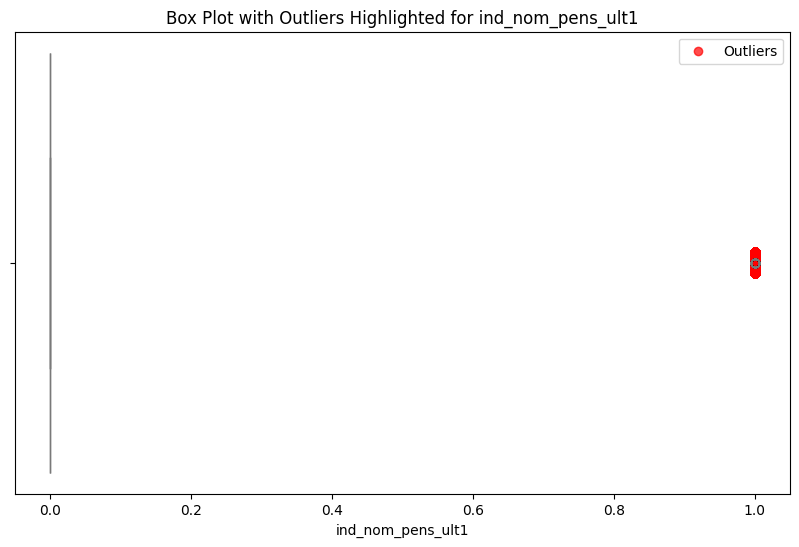

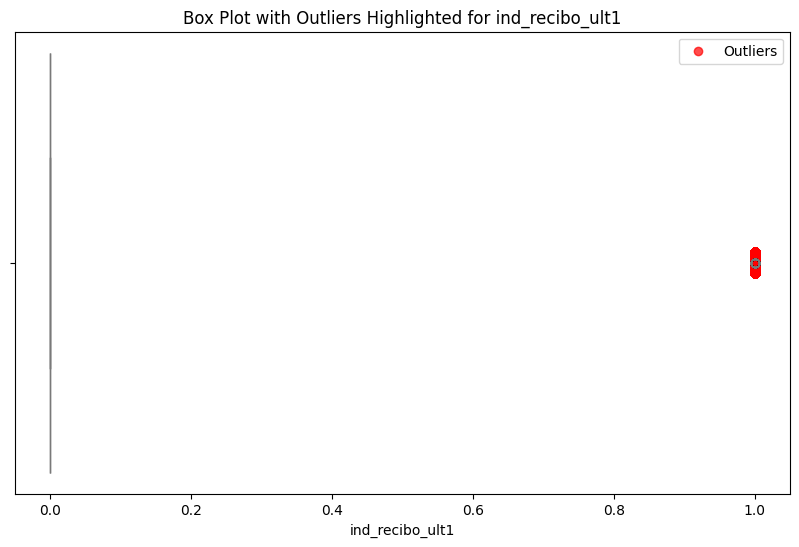

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Highlight the outliwers each num column
for column in nums_df.columns:
    plt.figure(figsize=(10, 6))

    # plot boxplot
    sns.boxplot(x=nums_df[column], color='lightblue', whis=1.5)

    # plot the outliers
    outlier_points = nums_df[(nums_df[column] < lower_limit[column]) | (nums_df[column] > upper_limit[column])][column]
    if not outlier_points.empty:
        y = np.random.uniform(low=-0.02, high=0.02, size=len(outlier_points))
        plt.scatter(outlier_points, y, color='red', label='Outliers', alpha=0.7)

    plt.title(f'Box Plot with Outliers Highlighted for {column}')
    plt.xlabel(column)
    plt.legend()
    plt.show()


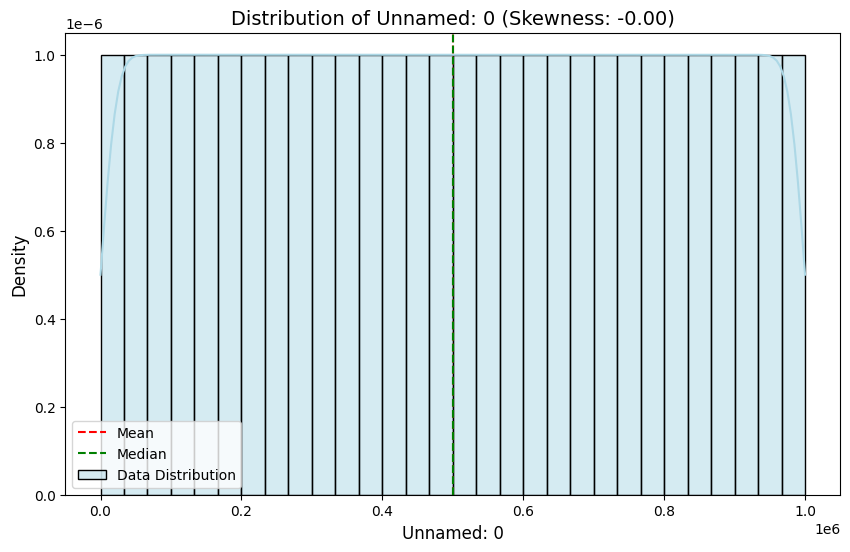

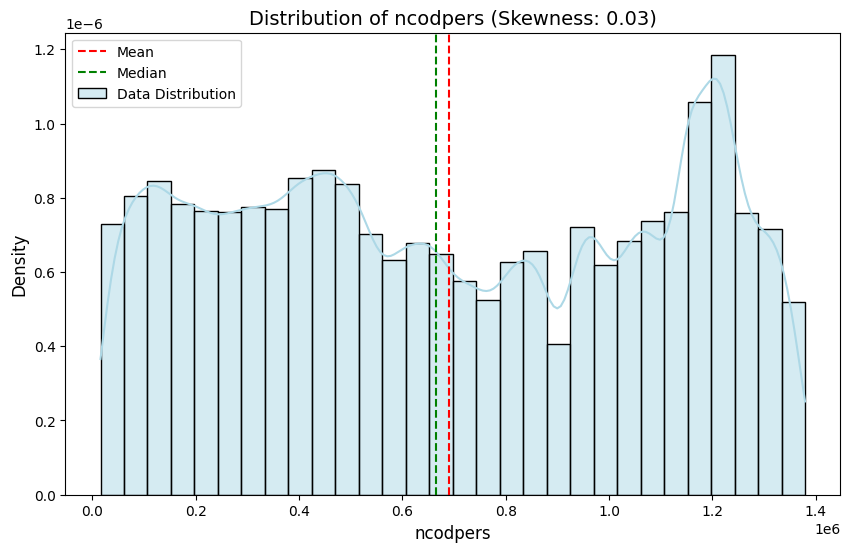

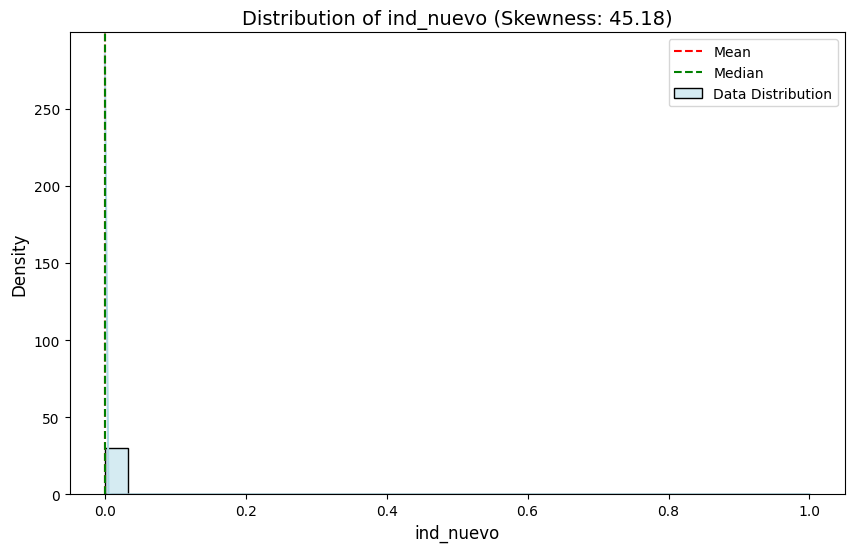

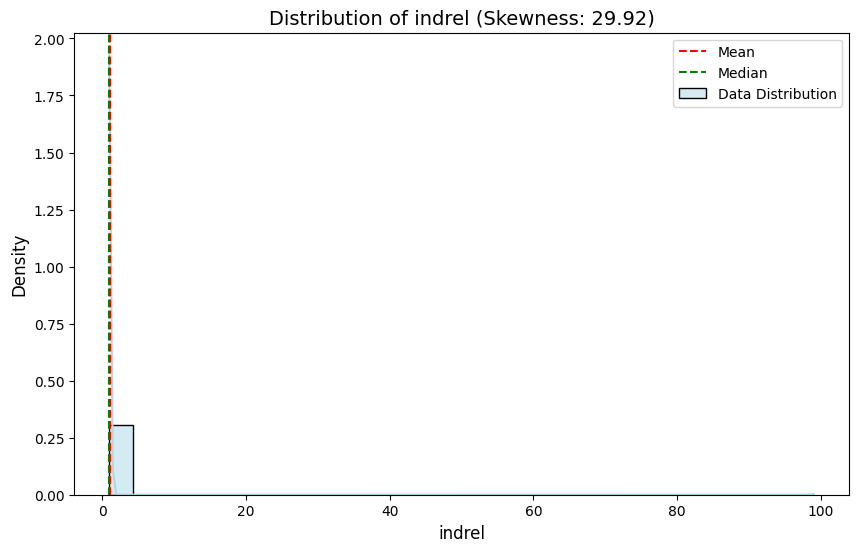

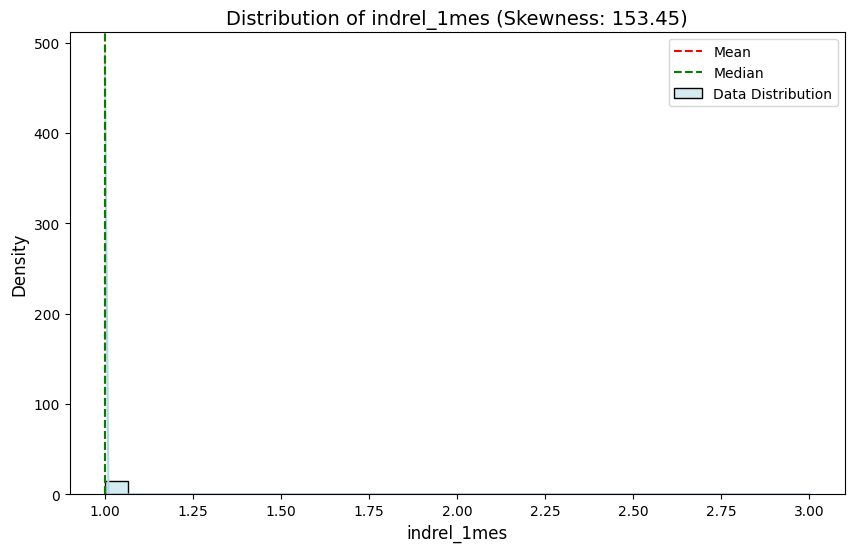

<ipython-input-30-79a6dcdc00b7>:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(nums_df[column].dropna())  # calculation with drop NA


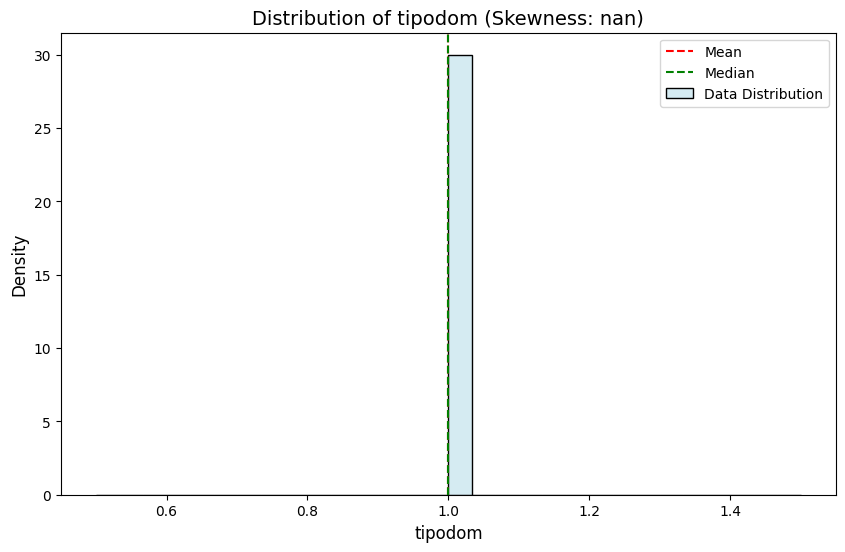

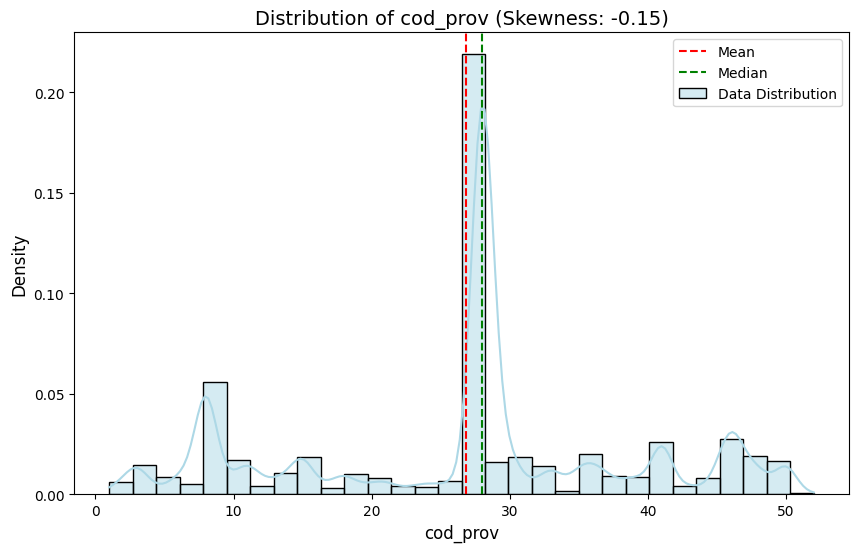

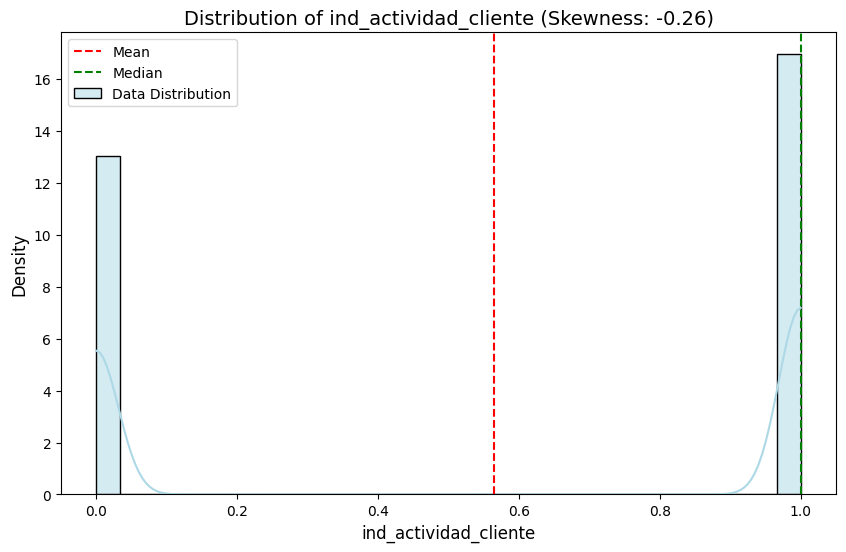

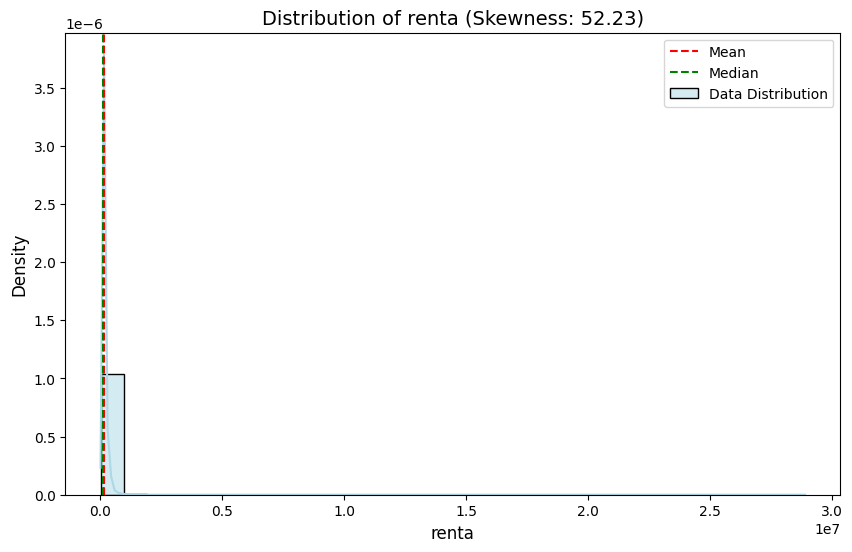

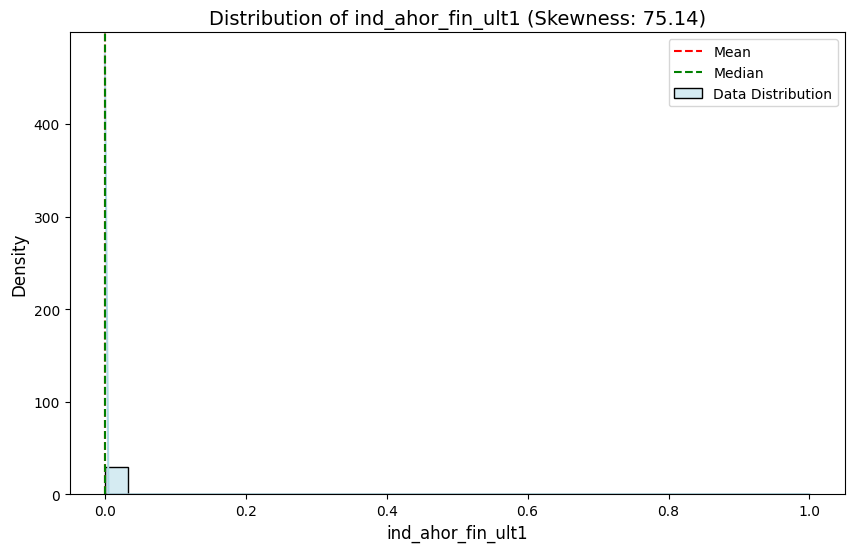

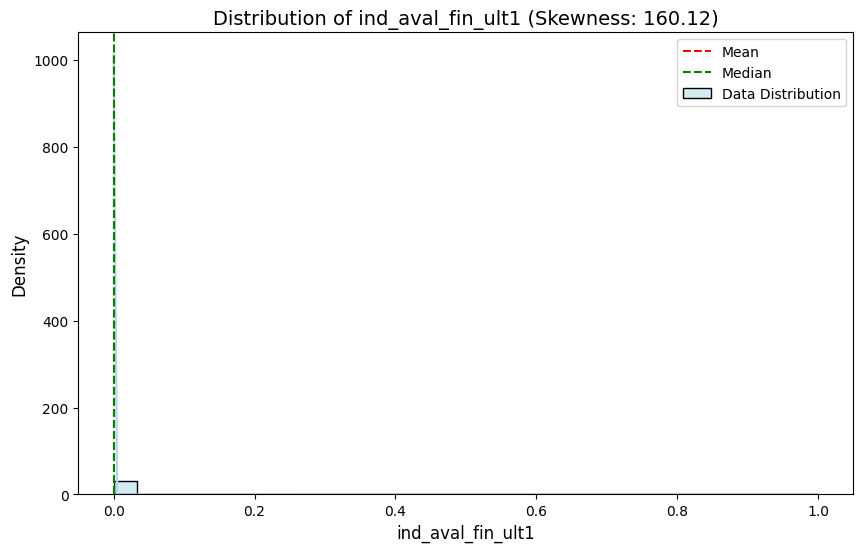

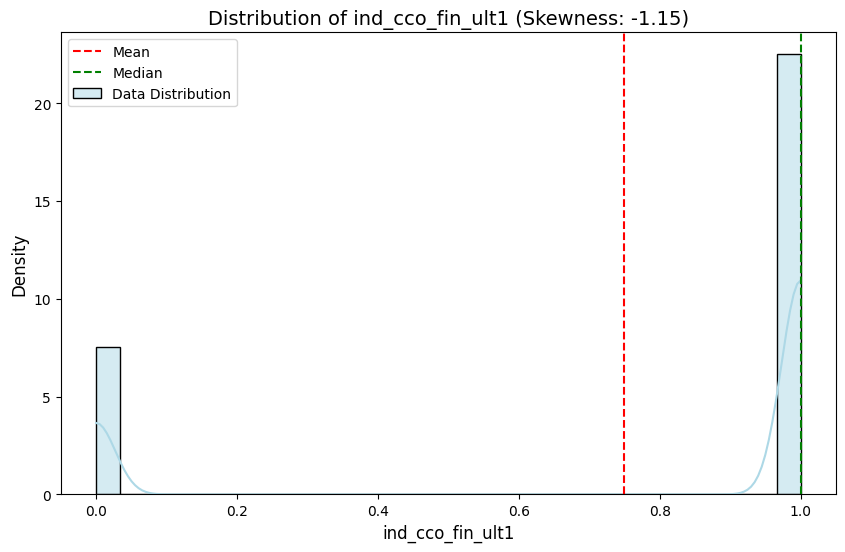

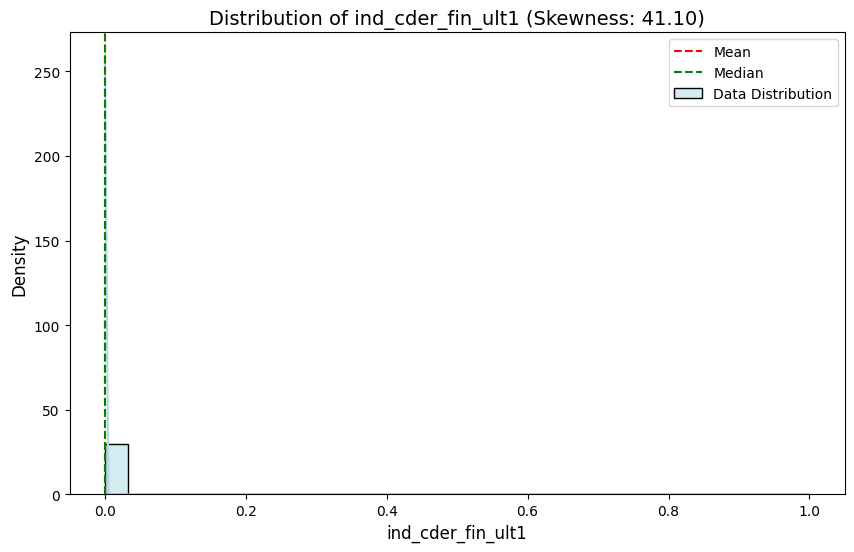

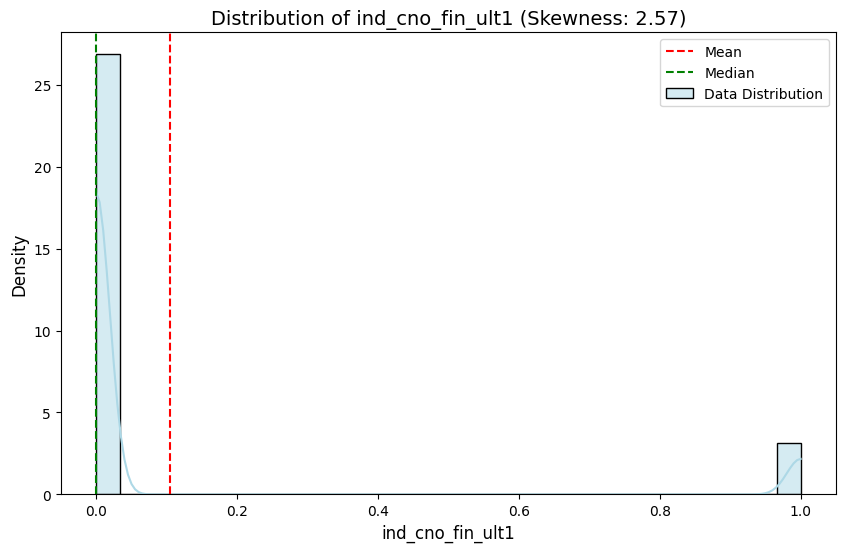

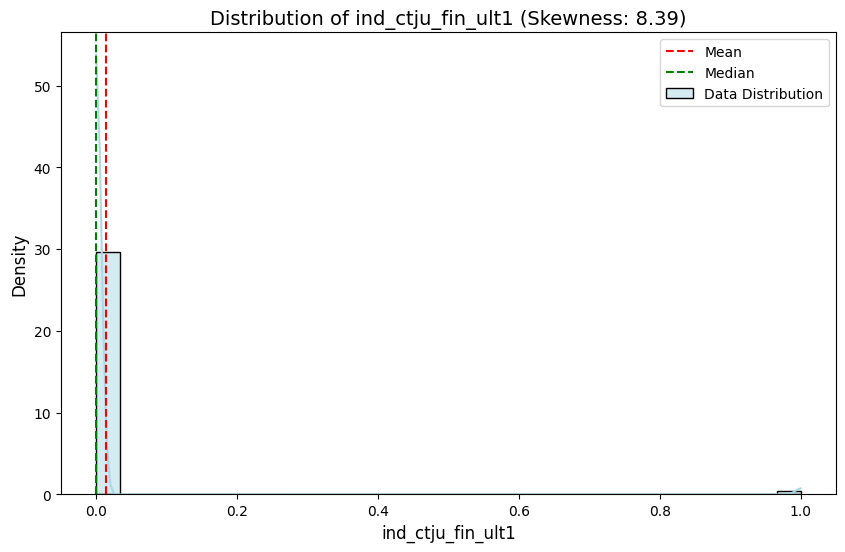

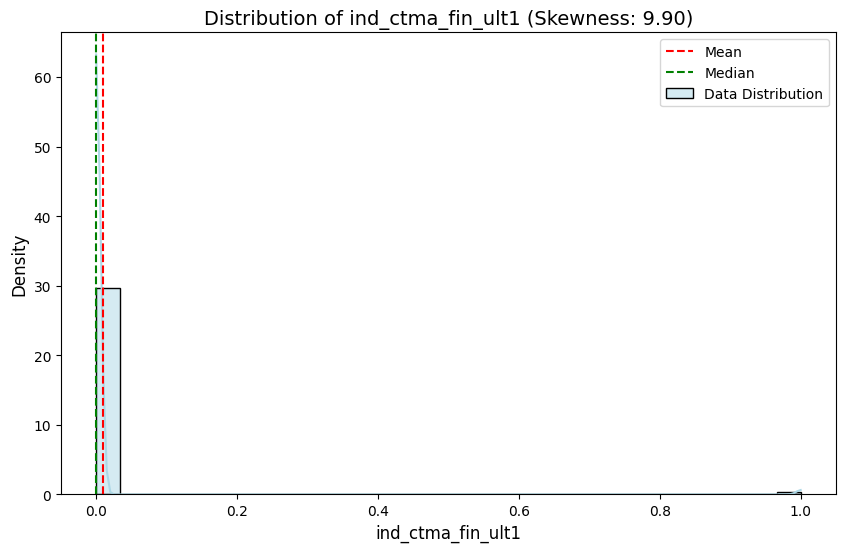

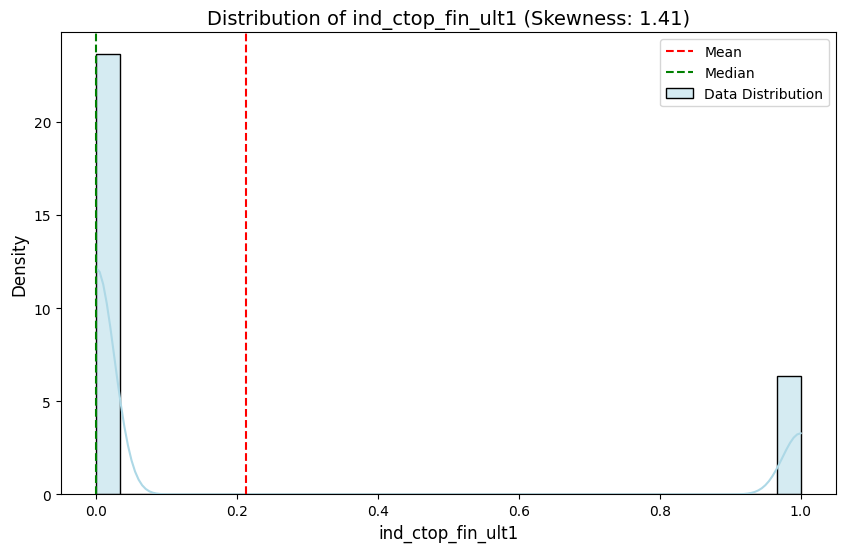

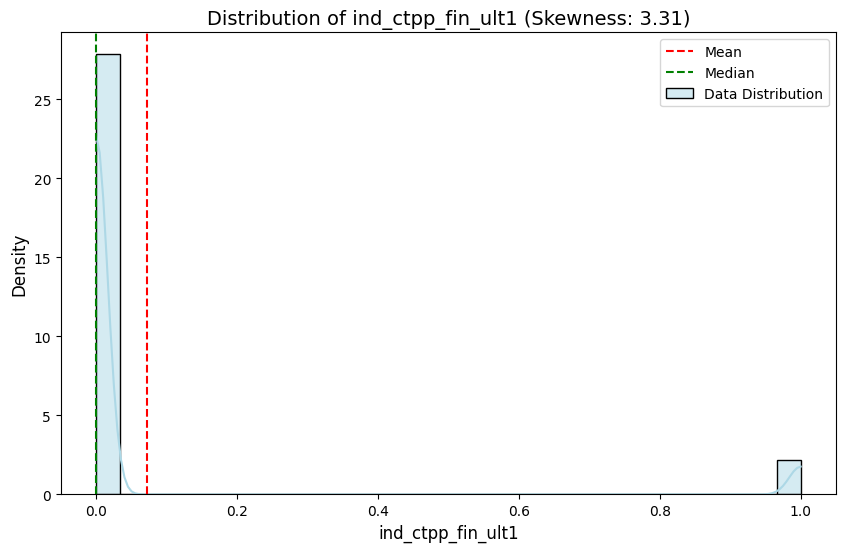

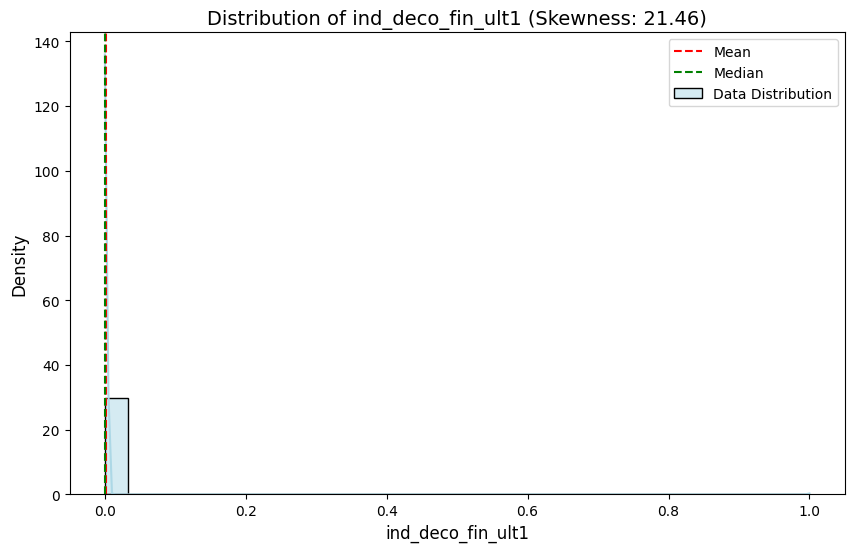

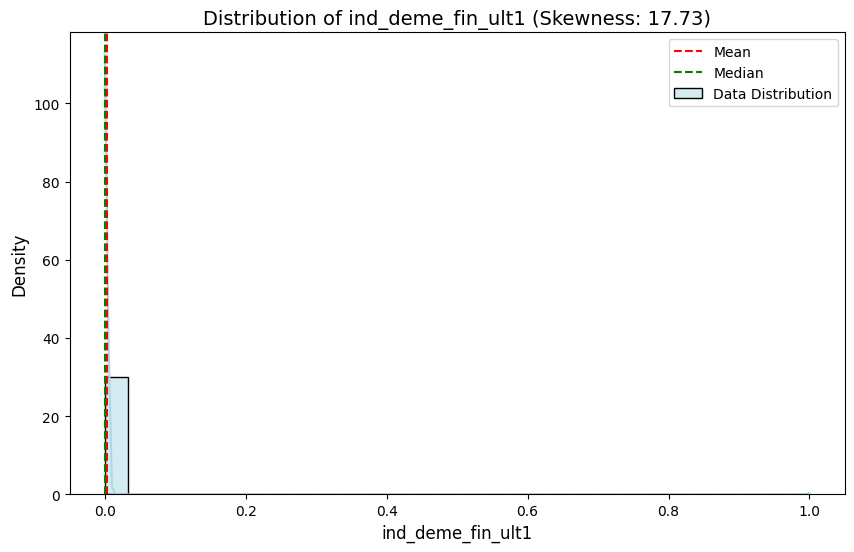

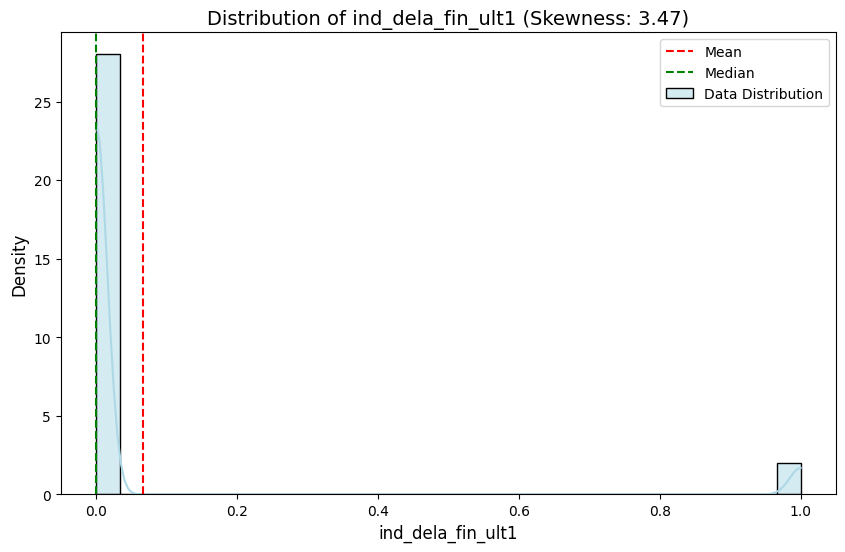

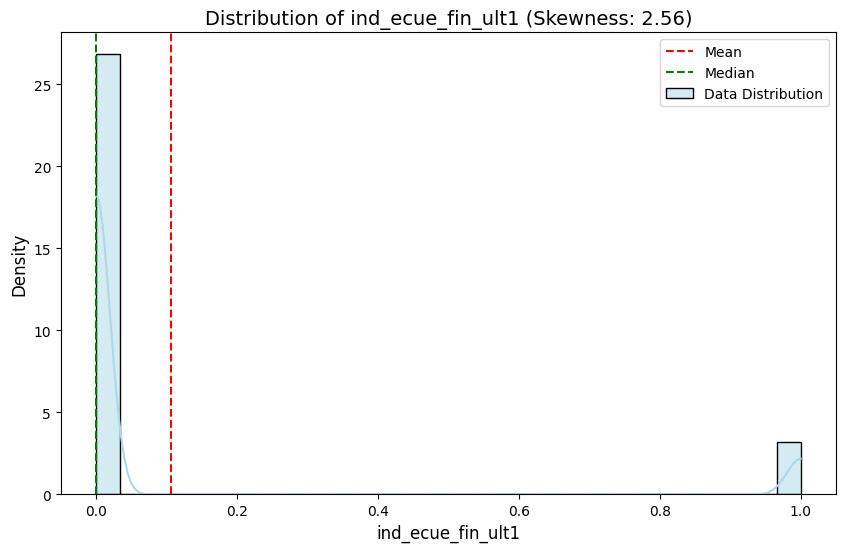

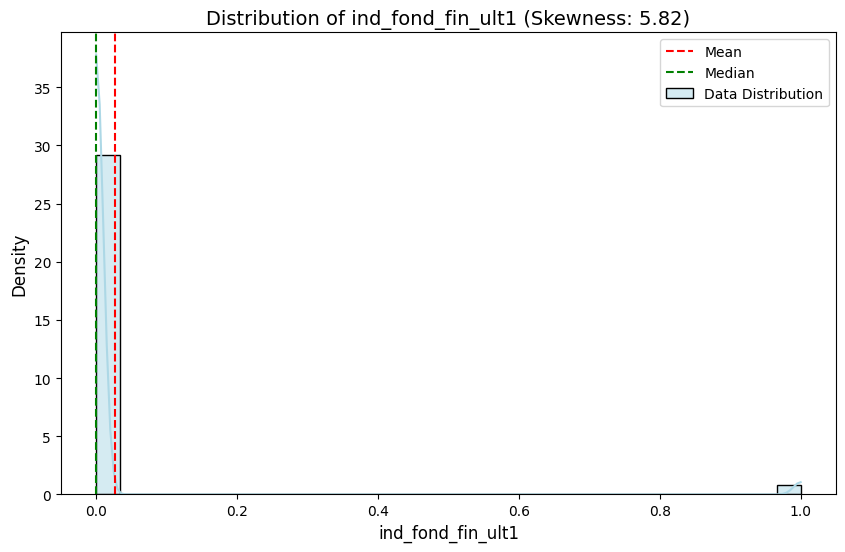

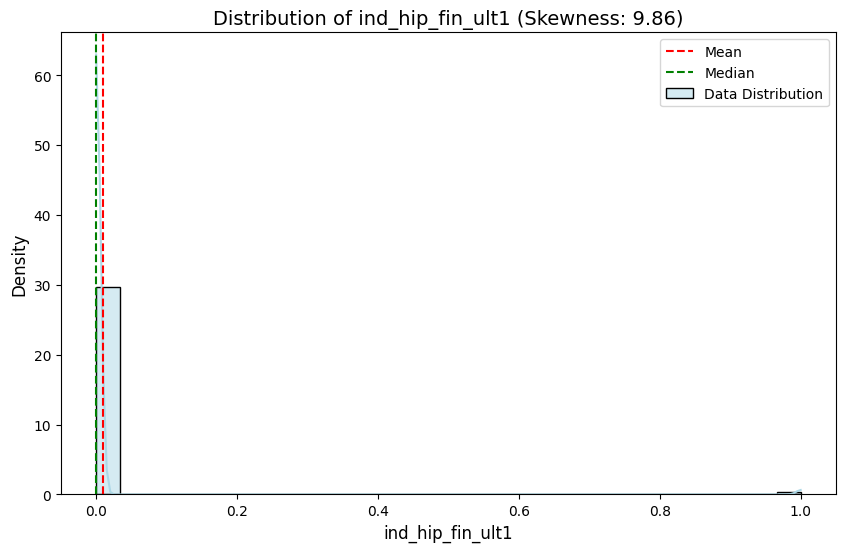

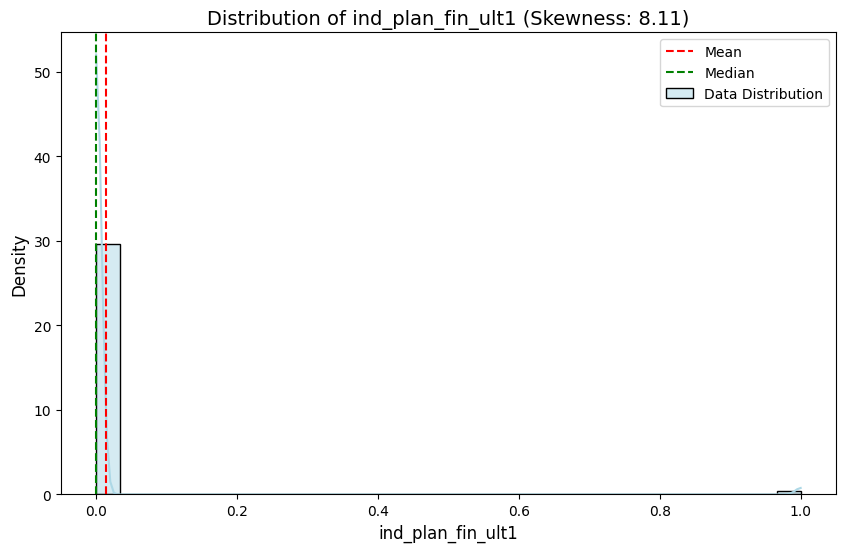

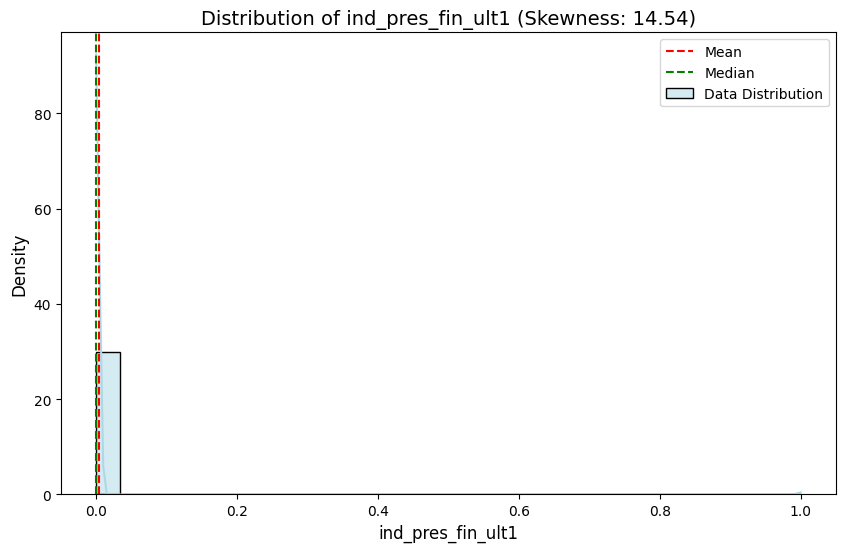

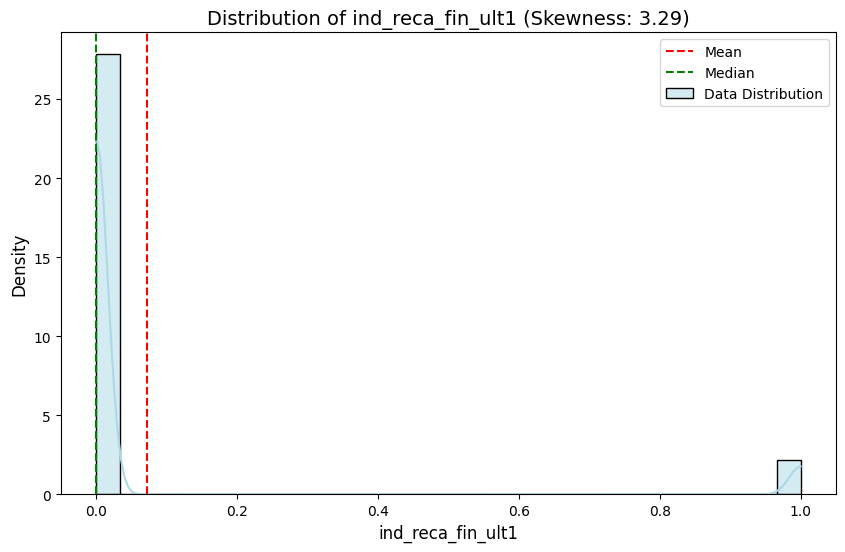

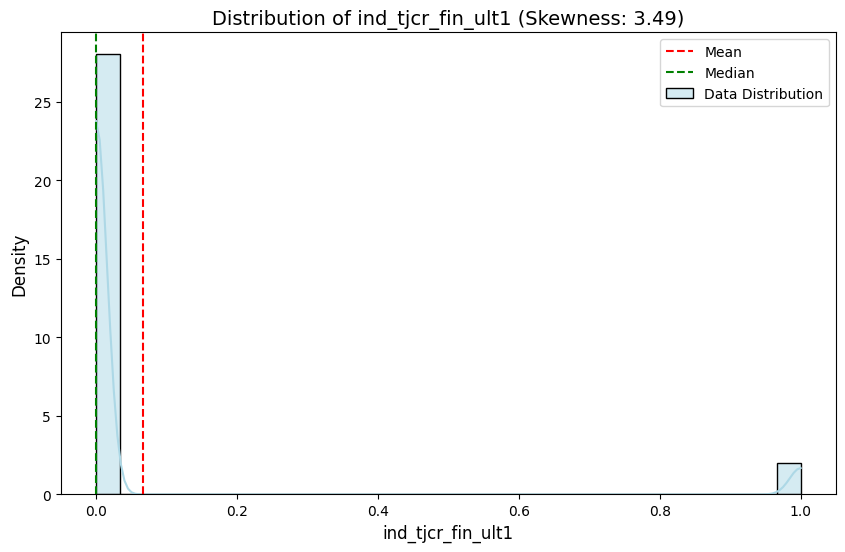

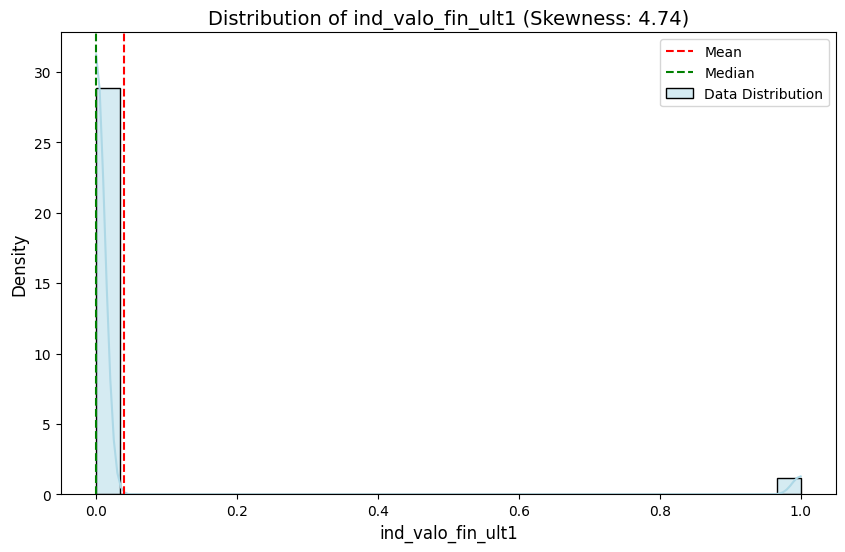

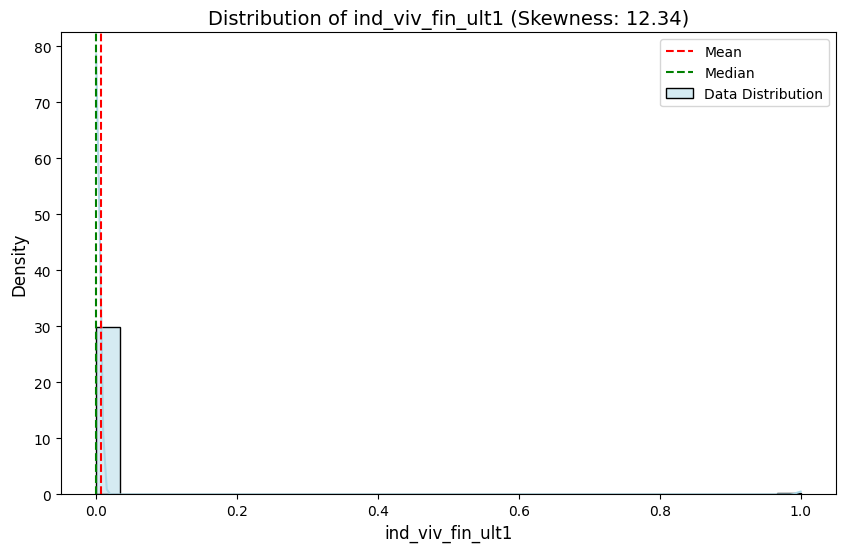

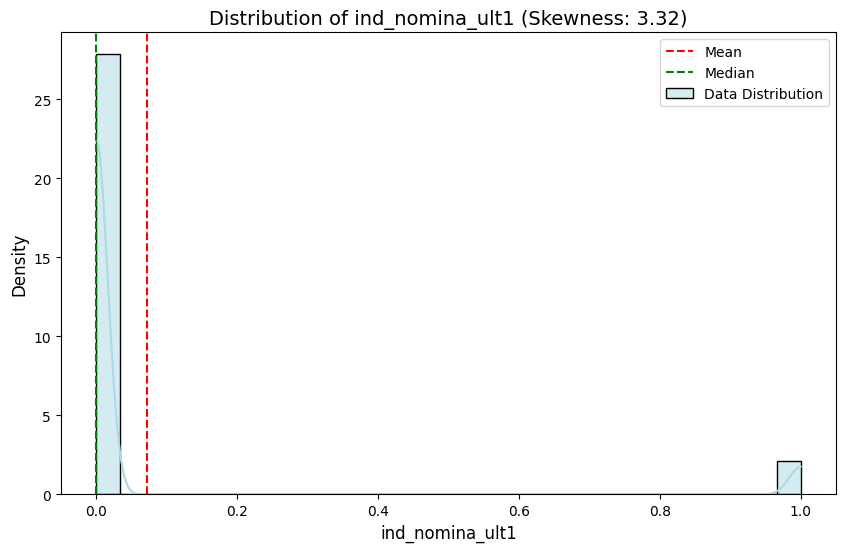

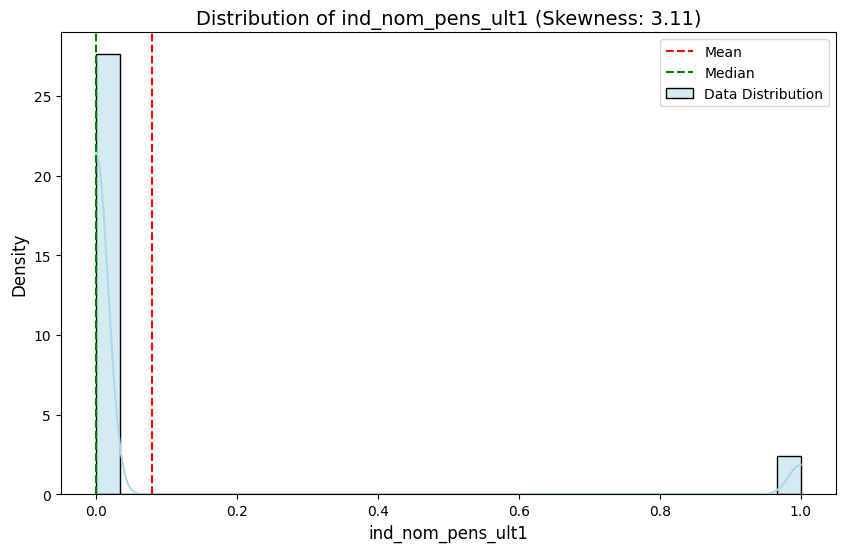

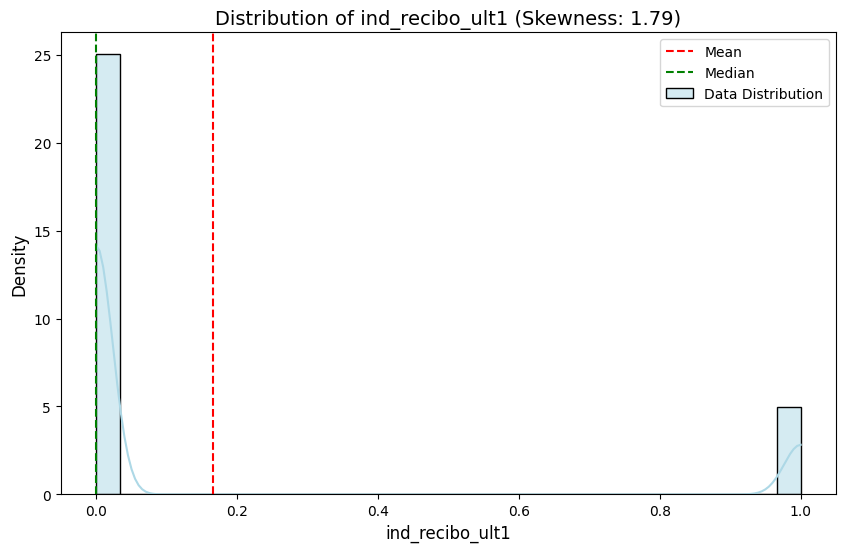

In [30]:
from scipy.stats import skew

# plot the histogram and KDE plot based on each variable
for column in nums_df.columns:
    plt.figure(figsize=(10, 6))

    # histogram and KDE plot
    sns.histplot(nums_df[column], kde=True, color='lightblue', bins=30, stat="density", label="Data Distribution")

    # Skewness
    skewness = skew(nums_df[column].dropna())  # calculation with drop NA

    # add the Skewnessinformation to plot
    plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.axvline(nums_df[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(nums_df[column].median(), color='green', linestyle='--', label='Median')

    plt.legend()
    plt.show()


# Data Cleaning

Since the columns of "conyuemp" and "ult_fec_cli_1t" have 99% of missing values, we drop them. It is not useful and appropriate to fill in the missing values with 99%.  

In [31]:
df.drop(columns=["conyuemp"], inplace = True, axis = 1)
df.drop(columns=["ult_fec_cli_1t"], inplace = True, axis = 1)

In [32]:
null_agg_percent(df)

,Column_Name,aggregate,percent
0,renta,175183,0.175183
1,nomprov,17734,0.017734
2,cod_prov,17734,0.017734
3,canal_entrada,10861,0.010861
4,sexo,10786,0.010786
5,indrel_1mes,10782,0.010782
6,ind_actividad_cliente,10782,0.010782
7,tipodom,10782,0.010782
8,indfall,10782,0.010782
9,indext,10782,0.010782


In [33]:
df.shape

(1000000, 46)

In [34]:
total_counts = np.product(df.shape)
print(f'total count in the dataset is {total_counts}')

total count in the dataset is 46000000


In [35]:
missing_values = df.isnull().sum().sum()
print(f'the count of missing value in the dataset is {missing_values}')

the count of missing value in the dataset is 372486


In [36]:
percent_of_missing_value = round(100*((missing_values)/total_counts),2)
print(f'the percent of missing values in the dataset is {percent_of_missing_value}%')

the percent of missing values in the dataset is 0.81%


**Insight**  
The percent of missing values are 0.81% in the dataset. That means it is not very high percentage. We can fill in the data using many methods.      


#Feature Engineering

## Impute Numerical missing values

Regarding **Renta**, the median and mean are almost same points and extremely skewed to right so applying **imputation with median**.

In [37]:
df['renta'] = df['renta'].fillna(df['renta'].median())

Apply **KNN Imputer** to numerical values  

**Nearest Neighbor Imputation** is a powerful technique that relies on the similarity between data points. It can provide more accurate imputations than simpler methods like mean or median imputation, especially when relationships between features are complex.

In [38]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer with k=2 neighbors
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
numeric_df = df.select_dtypes(include=[float, int]) #KNN impute only can apply for numerical values
imputed_data = imputer.fit_transform(numeric_df)

print(imputed_data)

[[0.000000e+00 1.375586e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 1.050611e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.000000e+00 1.050612e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [9.999970e+05 1.183294e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [9.999980e+05 1.183293e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [9.999990e+05 1.183289e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]]


In [39]:
# Convert NumPy array to DataFrame and apply to the original columns.
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)
print(imputed_df.head())

   Unnamed: 0   ncodpers  ind_nuevo  indrel  indrel_1mes  tipodom  cod_prov  ind_actividad_cliente      renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
0         0.0  1375586.0        0.0     1.0          1.0      1.0      29.0                    1.0   87218.10                0.0                0.0               1.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0             

In [40]:
# Convert the NumPy array to DataFrame (use the column names as automatically generated)
imputed_df.to_csv("imputed_data_numeric", index=False)

In [41]:
imputed_df.isnull().sum()

,0
Unnamed: 0,0
ncodpers,0
ind_nuevo,0
indrel,0
indrel_1mes,0
tipodom,0
cod_prov,0
ind_actividad_cliente,0
renta,0
ind_ahor_fin_ult1,0


In [42]:
# update the numeric columns in the original df with replacing the columns of imputed_df
df[numeric_df.columns] = imputed_df
print(df.head())

   Unnamed: 0  fecha_dato   ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  ind_nuevo antiguedad  indrel  indrel_1mes tiprel_1mes indresi indext canal_entrada indfall  tipodom  cod_prov      nomprov  ind_actividad_cliente      renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
0         0.0  2015-01-28  1375586.0            N              ES    H   35  2015-01-12        0.0          6     1.0          1.0           A       S      N           KHL       N      1.0      29.0       MALAGA                    1.0   87218.10                0.0                0.0               1.0     

## Impute Categorical missing values

In [44]:
cols = df.select_dtypes(['object']).columns.tolist()
print(cols)

In [45]:
for i in cols:
  df[i] = df[i].astype('category')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   Unnamed: 0             1000000 non-null  float64 
 1   fecha_dato             1000000 non-null  category
 2   ncodpers               1000000 non-null  float64 
 3   ind_empleado           989218 non-null   category
 4   pais_residencia        989218 non-null   category
 5   sexo                   989214 non-null   category
 6   age                    1000000 non-null  category
 7   fecha_alta             989218 non-null   category
 8   ind_nuevo              1000000 non-null  float64 
 9   antiguedad             1000000 non-null  category
 10  indrel                 1000000 non-null  float64 
 11  indrel_1mes            1000000 non-null  float64 
 12  tiprel_1mes            989218 non-null   category
 13  indresi                989218 non-null   category
 14  ind

In [49]:
cat_cols = df.select_dtypes(['category']).columns.tolist()
print(cat_cols)

['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'antiguedad', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov']


In [50]:
for column in cat_cols:
  mode = df[column].mode()[0]
  df[column] = df[column].fillna(value=mode)

In [51]:
df.isnull().sum()

,0
Unnamed: 0,0
fecha_dato,0
ncodpers,0
ind_empleado,0
pais_residencia,0
sexo,0
age,0
fecha_alta,0
ind_nuevo,0
antiguedad,0
